# Introduction to Pandas

## Setup and preliminaries

We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [1]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please uncomment the following command and execute:

In [ ]:
# !sudo python3 -m pip install -U pandas

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [10]:
# Make the graphs a bit bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

## Basic Example: Creating a DataFrame from Scratch

This is an example of creating a dataframe by passing a list of dictionaries.

In [4]:
df = pd.DataFrame([ 
    {"First Name": "Panos", "Last Name":" Ipeirotis"},
    {"First Name": "John", "Last Name":" Doe"},
    {"Last Name":"Trump"}
])


In [5]:
df

First Name   Last Name
0      Panos   Ipeirotis
1       John         Doe
2        NaN       Trump

## Analyzing Data in Files

We will use a dataset with restaurant inspection results in NYC which is stored at `/data/restaurants.csv`.

If you do not have it, then uncomment below the lines that start with ! and execute the following:

In [11]:
# Creates a folder "data" under the current folder
!mkdir -p data
# Removes any prior file if it exists
!rm -f data/restaurant.csv*
# Fetches the most recent dataset and stores it under the folder data
!curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o data/restaurant.csv
# Compresses the text file, both for saving space and for loading faster
!gzip data/restaurant.csv
# Take a look at the first 3 lines of the file, to ensure that everything worked fine
# !gzip -cd data/restaurant.csv.gz | head -3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  133M    0  133M    0     0  7507k      0 --:--:--  0:00:18 --:--:-- 9333k


### Reading a CSV file

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [12]:
import pandas as pd
restaurants = pd.read_csv("data/restaurant.csv.gz", 
                          encoding='utf_8', 
                          dtype = 'unicode',
                          parse_dates = True,
                          infer_datetime_format = True,
                          low_memory=False)

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [13]:
restaurants.head(5)

CAMIS                    DBA   BORO BUILDING           STREET ZIPCODE  \
0  30075445  MORRIS PARK BAKE SHOP  BRONX     1007  MORRIS PARK AVE   10462   
1  30075445  MORRIS PARK BAKE SHOP  BRONX     1007  MORRIS PARK AVE   10462   
2  30075445  MORRIS PARK BAKE SHOP  BRONX     1007  MORRIS PARK AVE   10462   
3  30075445  MORRIS PARK BAKE SHOP  BRONX     1007  MORRIS PARK AVE   10462   
4  30075445  MORRIS PARK BAKE SHOP  BRONX     1007  MORRIS PARK AVE   10462   

        PHONE CUISINE DESCRIPTION INSPECTION DATE  \
0  7188924968              Bakery      05/16/2019   
1  7188924968              Bakery      05/16/2019   
2  7188924968              Bakery      05/16/2019   
3  7188924968              Bakery      05/16/2019   
4  7188924968              Bakery      05/16/2019   

                                            ACTION VIOLATION CODE  \
0  Violations were cited in the following area(s).            04L   
1  Violations were cited in the following area(s).            08A   
2  Violations were cited in the following area(s).            08C   
3  Violations were cited in the following area(s).            10E   
4  Violations were cited in the following area(s).            10F   

                               VIOLATION DESCRIPTION CRITICAL FLAG SCORE  \
0  Evidence of mice or live mice present in facil...      Critical    18   
1  Facility not vermin proof. Harborage or condit...  Not Critical    18   
2  Pesticide use not in accordance with label or ...  Not Critical    18   
3  Accurate thermometer not provided in refrigera...  Not Critical    18   
4  Non-food contact surface improperly constructe...  Not Critical    18   

  GRADE GRADE DATE RECORD DATE                        INSPECTION TYPE  
0   NaN        NaN  05/28/2019  Cycle Inspection / Initial Inspection  
1   NaN        NaN  05/28/2019  Cycle Inspection / Initial Inspection  
2   NaN        NaN  05/28/2019  Cycle Inspection / Initial Inspection  
3   NaN        NaN  05/28/2019  Cycle Inspection / Initial Inspection  
4   NaN        NaN  05/28/2019  Cycle Inspection / Initial Inspection

The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [14]:
restaurants.describe()

CAMIS      DBA       BORO BUILDING    STREET ZIPCODE       PHONE  \
count     384458   383861     384458   384228    384454  378903      384441   
unique     27095    21269          6     7318      3270     226       25536   
top     50035784  DUNKIN'  MANHATTAN        1  BROADWAY   10003  7185958100   
freq          81     4108     151802     2119     14193   10136         198   

       CUISINE DESCRIPTION INSPECTION DATE  \
count               384458          384458   
unique                  84            1389   
top               American      01/01/1900   
freq                 82332            1364   

                                                 ACTION VIOLATION CODE  \
count                                            383094         378624   
unique                                                5             99   
top     Violations were cited in the following area(s).            10F   
freq                                             359915          54324   

                                    VIOLATION DESCRIPTION CRITICAL FLAG  \
count                                              375653        384458   
unique                                                 91             3   
top     Non-food contact surface improperly constructe...      Critical   
freq                                                54324        209640   

         SCORE   GRADE  GRADE DATE RECORD DATE  \
count   366486  193442      191426      384458   
unique     134       7        1305           1   
top         12       A  05/09/2019  05/28/2019   
freq     39812  153480         536      384458   

                              INSPECTION TYPE  
count                                  383094  
unique                                     32  
top     Cycle Inspection / Initial Inspection  
freq                                   224715

We can also check the data types for each column

In [15]:
restaurants.dtypes

CAMIS                    object
DBA                      object
BORO                     object
BUILDING                 object
STREET                   object
ZIPCODE                  object
PHONE                    object
CUISINE DESCRIPTION      object
INSPECTION DATE          object
ACTION                   object
VIOLATION CODE           object
VIOLATION DESCRIPTION    object
CRITICAL FLAG            object
SCORE                    object
GRADE                    object
GRADE DATE               object
RECORD DATE              object
INSPECTION TYPE          object
dtype: object

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions. We examine how to convert data types below.

### Descriptive Statistics for Numeric Variables


#### Converting Data Types to Numeric

The `object` type is a string. When we want to convert an object to numeric, we can use the `pd.to_numeric` function, as shown below:

In [16]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

#### Basic descriptive statistics for numeric variables

And now that SCORE is a numeric variable, we can get more detailed descriptive statistics for the variable using the `.describe()` command:

In [12]:
restaurants.SCORE.describe()

count    366486.000000
mean         19.861847
std          14.273594
min          -1.000000
25%          11.000000
50%          15.000000
75%          25.000000
max         166.000000
Name: SCORE, dtype: float64

And now that SCORE is a numeric variable, we can examine its distribution by using the `hist` command of Pandas, which creates a histogram. (The histogram is lso available as `plot.hist`, or `plot(kind='hist'))`.)

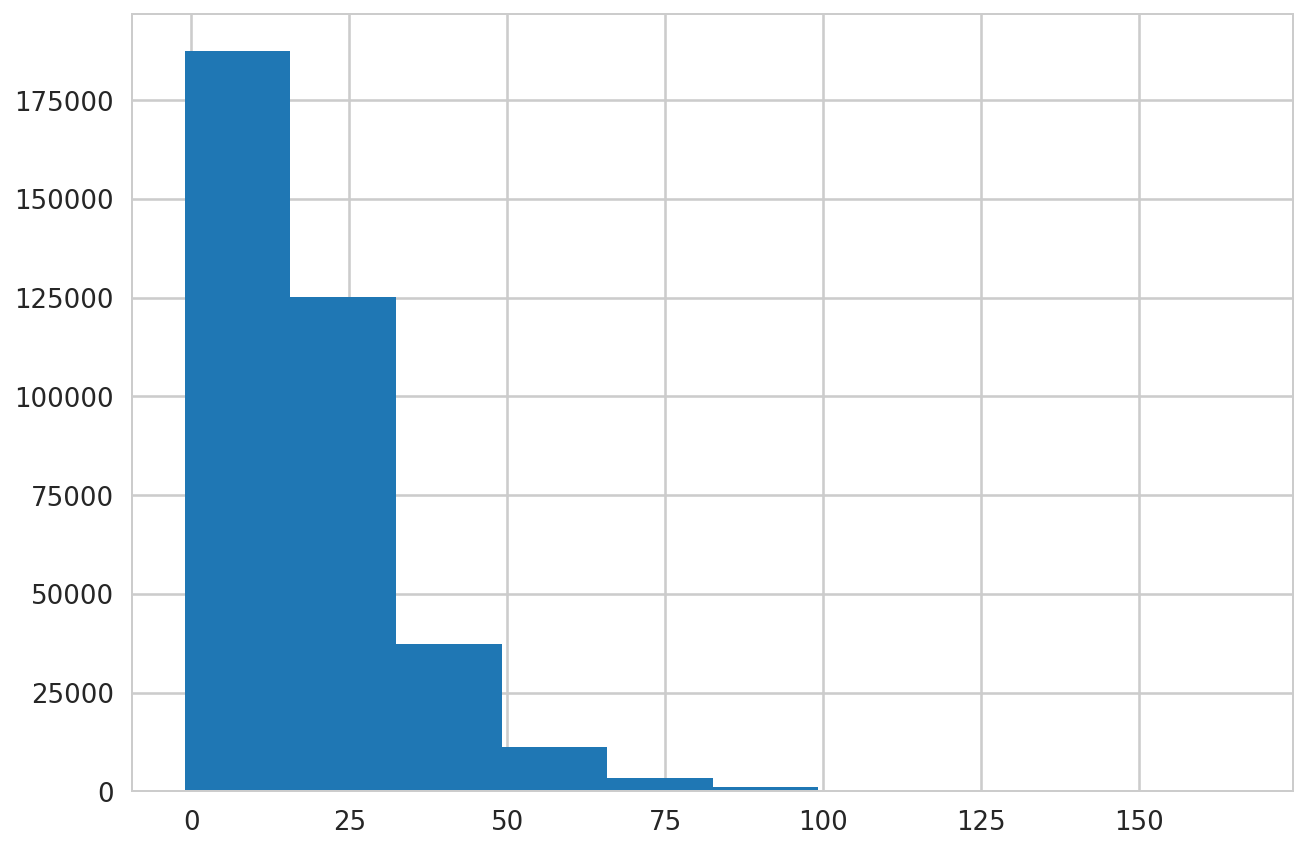

In [13]:
restaurants["SCORE"].hist()

By default, the histogram has ~10 bars in out plot. We can change the resolution of the histogram using the `bins` variable. Larger number of `bins` allow for higher resolution, but if we increase the number too much, many bins end up having very few, or no data points. For example, experiment with changing the balue of bins below, and change the value from 50 to something bigger.

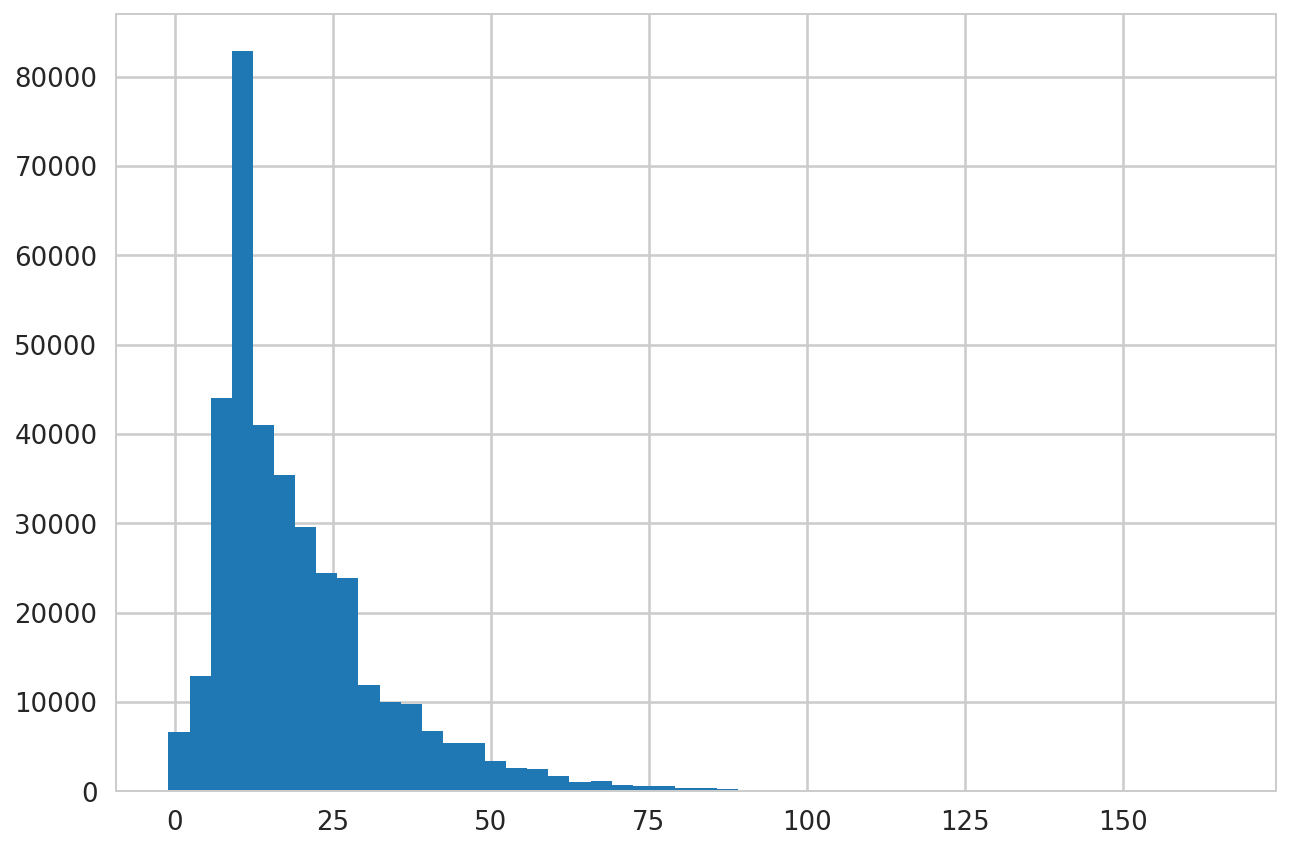

In [14]:
restaurants["SCORE"].hist(bins=50)

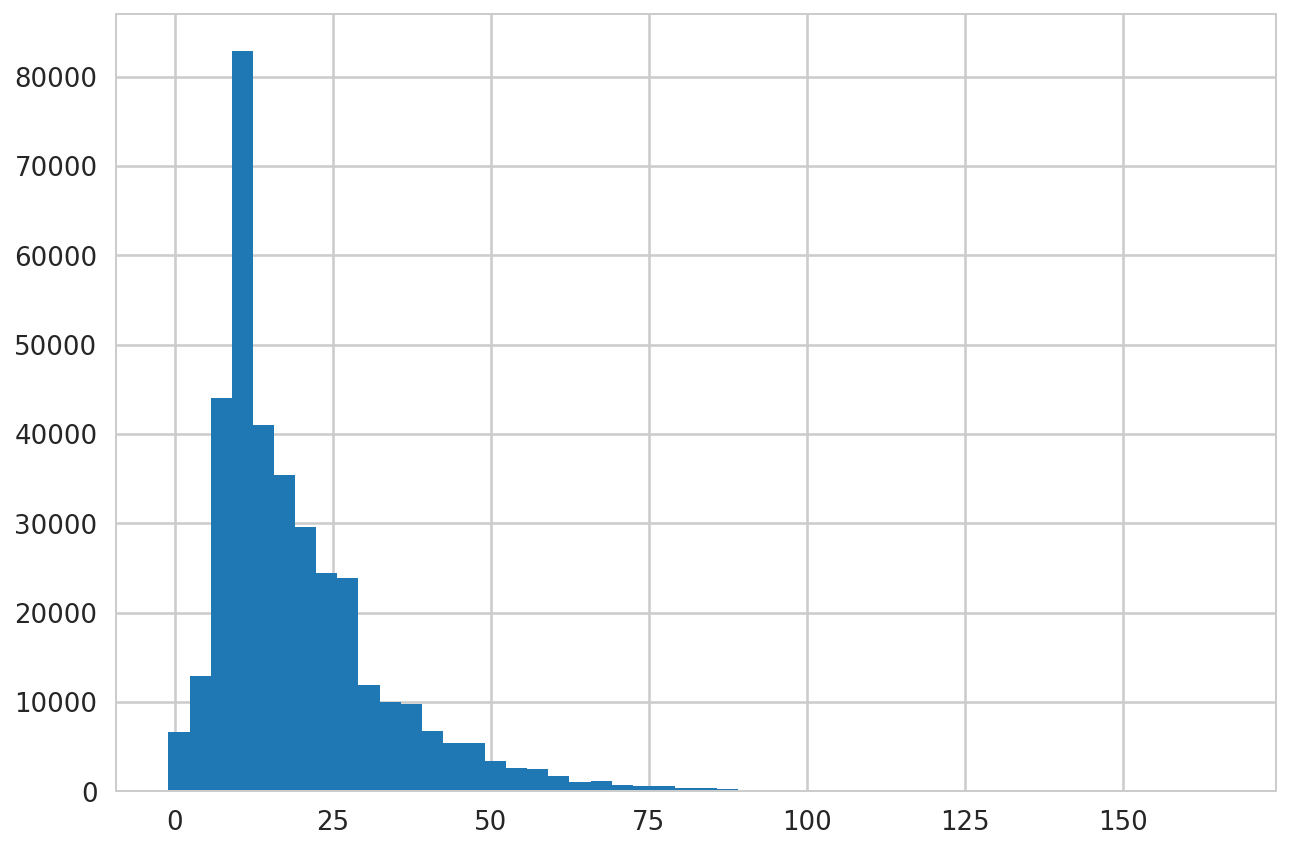

In [15]:
# For column names without a space, we can also access directly the column as follows:
restaurants.SCORE.hist(bins=50)

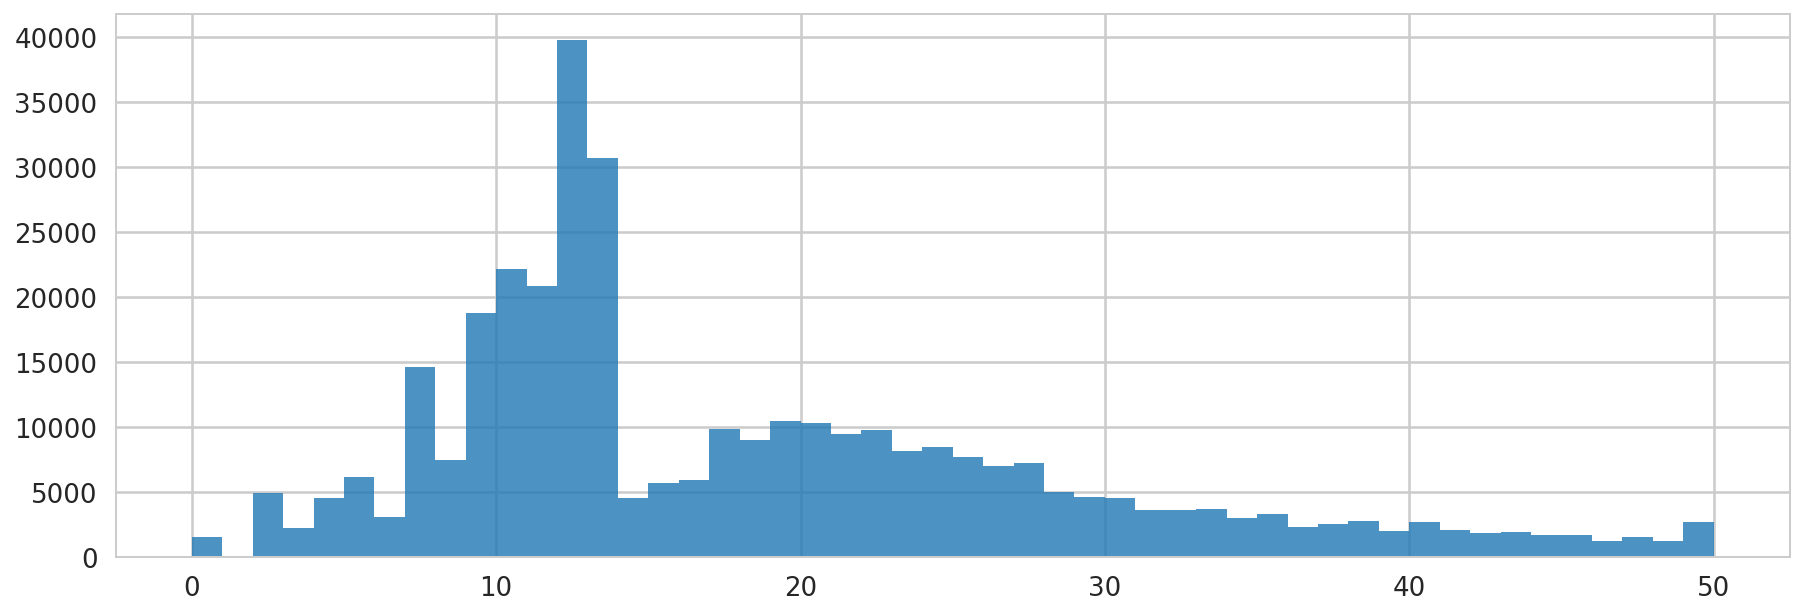

In [16]:
# A quick exposure to various options of the "hist" command 
restaurants.SCORE.hist(bins=50, # use 50 bars
                          range=(0,50), # x-axis from 0 to 50
                          density=False,  # show normalized count (density=True), or raw counts (density= False)
                          figsize=(15,5), # controls the size of the plot
                          alpha = 0.8 # make the plot 20% transparent
                         )

#### Kernel Density Estimation (KDE)

An alternative to histograms is to use the **kernel density**, which estimates a continuous function, instead of the bucketized counts, which tends to be discontunuous and bumpy. We can access this usind the `.plot(kind='kde')` command:

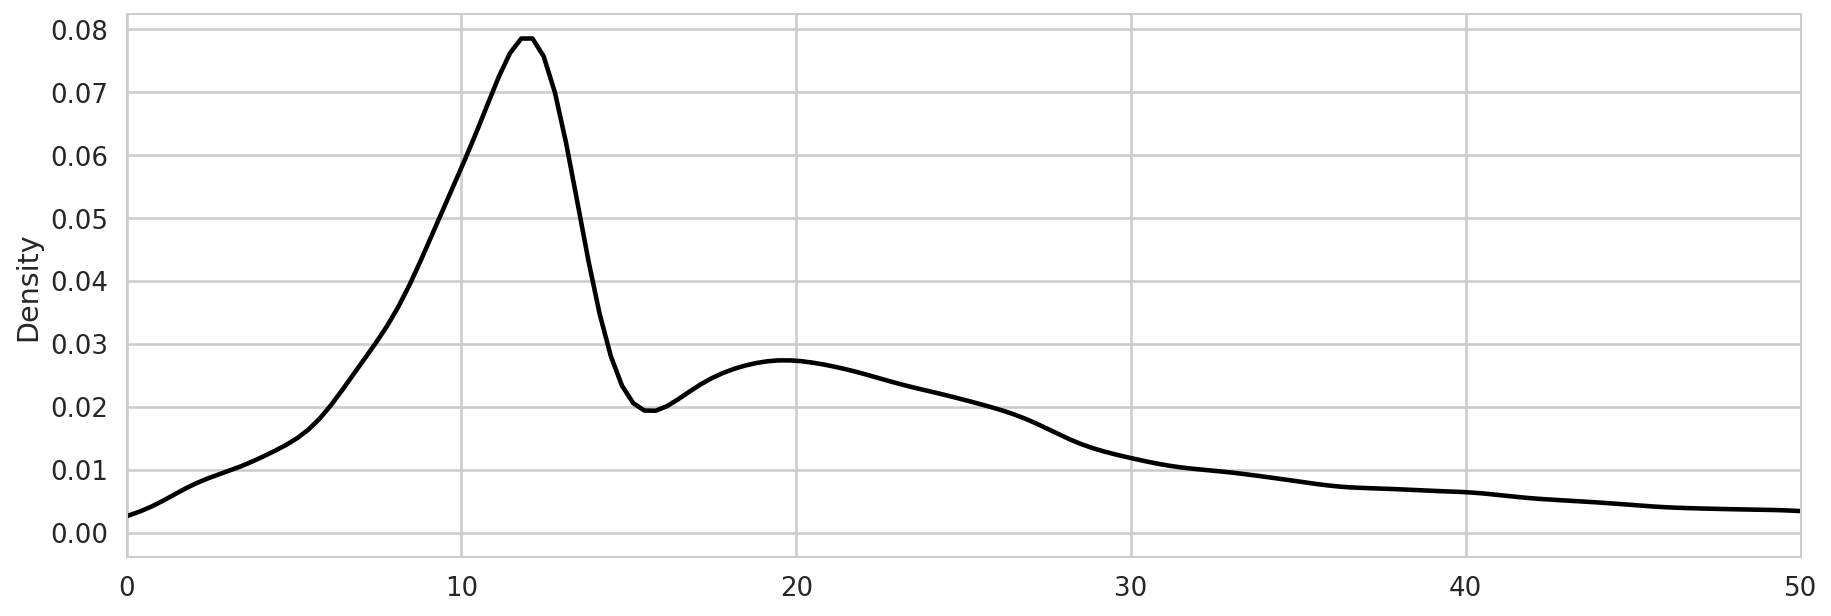

In [17]:
# This plots the density of a numeric attribute
# kde = kernel density estimation
restaurants.SCORE.plot(
    kind='kde', 
    color='Black', 
    xlim=(0,50), 
    figsize=(15,5)
)

### Converting Dates

Now let's convert the dates columns into the appropriate data types. Let's take a look at a few dates.

In [18]:
restaurants["GRADE DATE"].head(10)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5    05/11/2018
6    05/11/2018
7    05/18/2017
8    05/18/2017
9    03/04/2019
Name: GRADE DATE, dtype: object

For that, we need to understand first how to [parse dates using the Python conventions](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

The relevant entries from the table are:
* `%m` Month as a zero-padded decimal number.
* `%d` 	Day of the month as a zero-padded decimal number.
* `%Y` Year with century as a decimal number.

Now, we can specify how to parse these dates. (In principle, we can let Pandas do this automatically, but it is _much_ faster if we specify it ourselves. It is also much less error-prone.)

In [19]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [20]:
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [21]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

INSPECTION DATE           GRADE DATE          RECORD DATE
count                384458               191426               384458
unique                 1389                 1305                    1
top     1900-01-01 00:00:00  2019-05-09 00:00:00  2019-05-28 00:00:00
freq                   1364                  536               384458
first   1900-01-01 00:00:00  2012-05-01 00:00:00  2019-05-28 00:00:00
last    2019-05-25 00:00:00  2019-05-25 00:00:00  2019-05-28 00:00:00

#### Exercise

* Plot a histogram for `INSPECTION DATE`, `GRADE DATE`, `RECORD DATE`. What do you see?
* Try modifying the `bins` parameter. What are the results?
* The `range=(start, finish)` command is often useful, when we want to focus on a particular part of the dataset. Try using that for  `INSPECTION DATE` to limit the dates to be between 1/1/2014 and 05/31/2018.

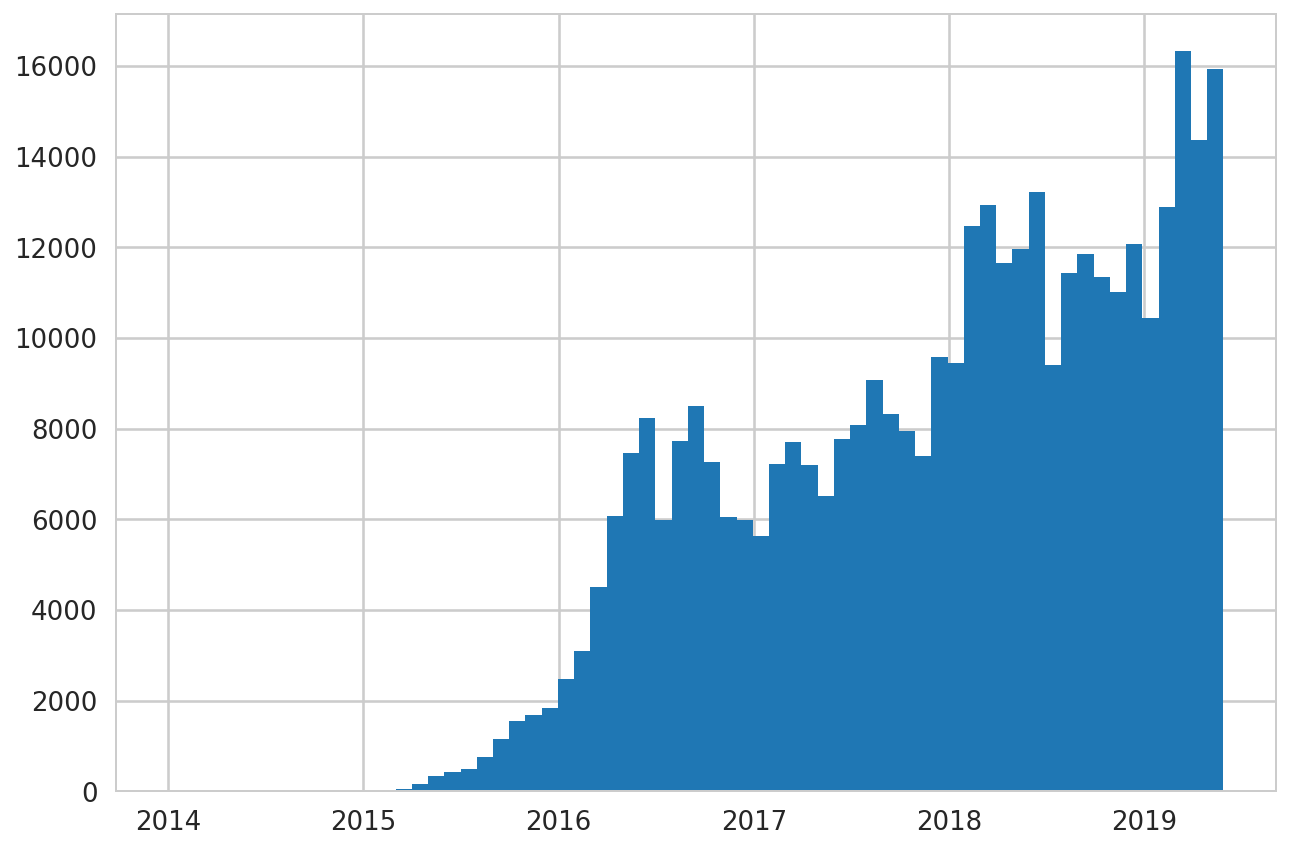

In [31]:
# your code here
#ndex(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
#       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
 #      'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
  #     'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
   #   dtype='object')
restaurants["INSPECTION DATE"].hist(
    range=("1/1/2014", "5/29/2019"), bins=5*12+5)
#Survivor bias! They only keep violations for restaurants that remain open


#### Solution

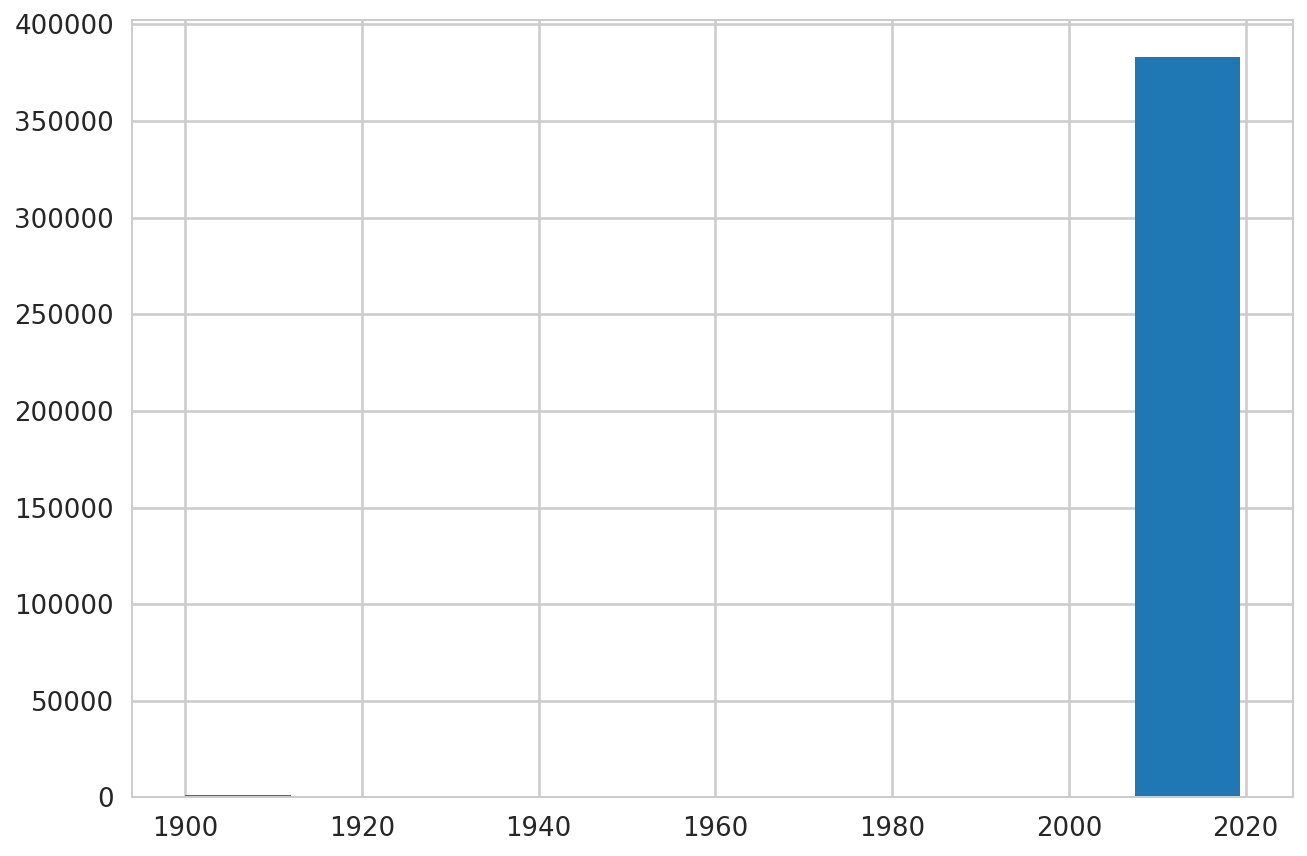

In [32]:
# Not very appealing
restaurants['INSPECTION DATE'].hist()

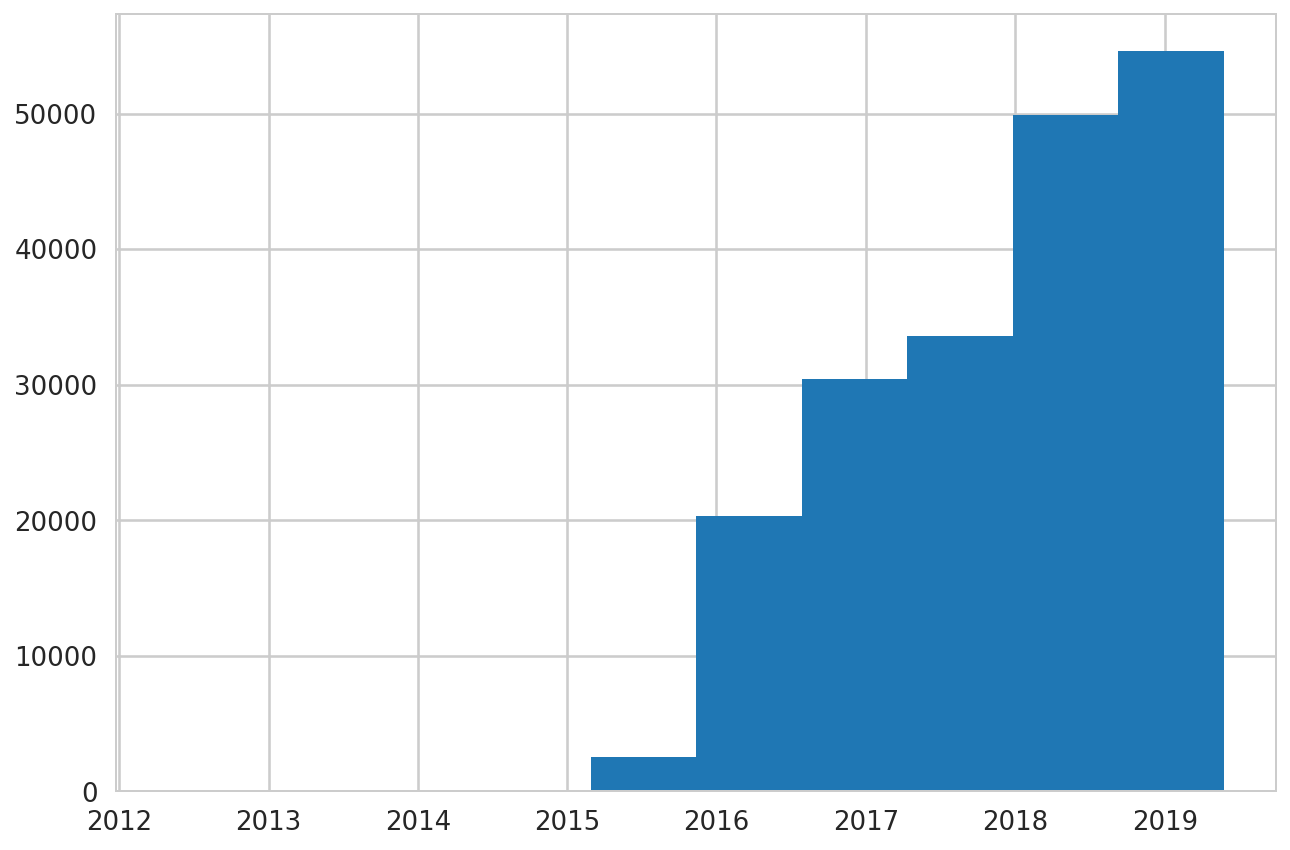

In [33]:
restaurants['GRADE DATE'].hist()

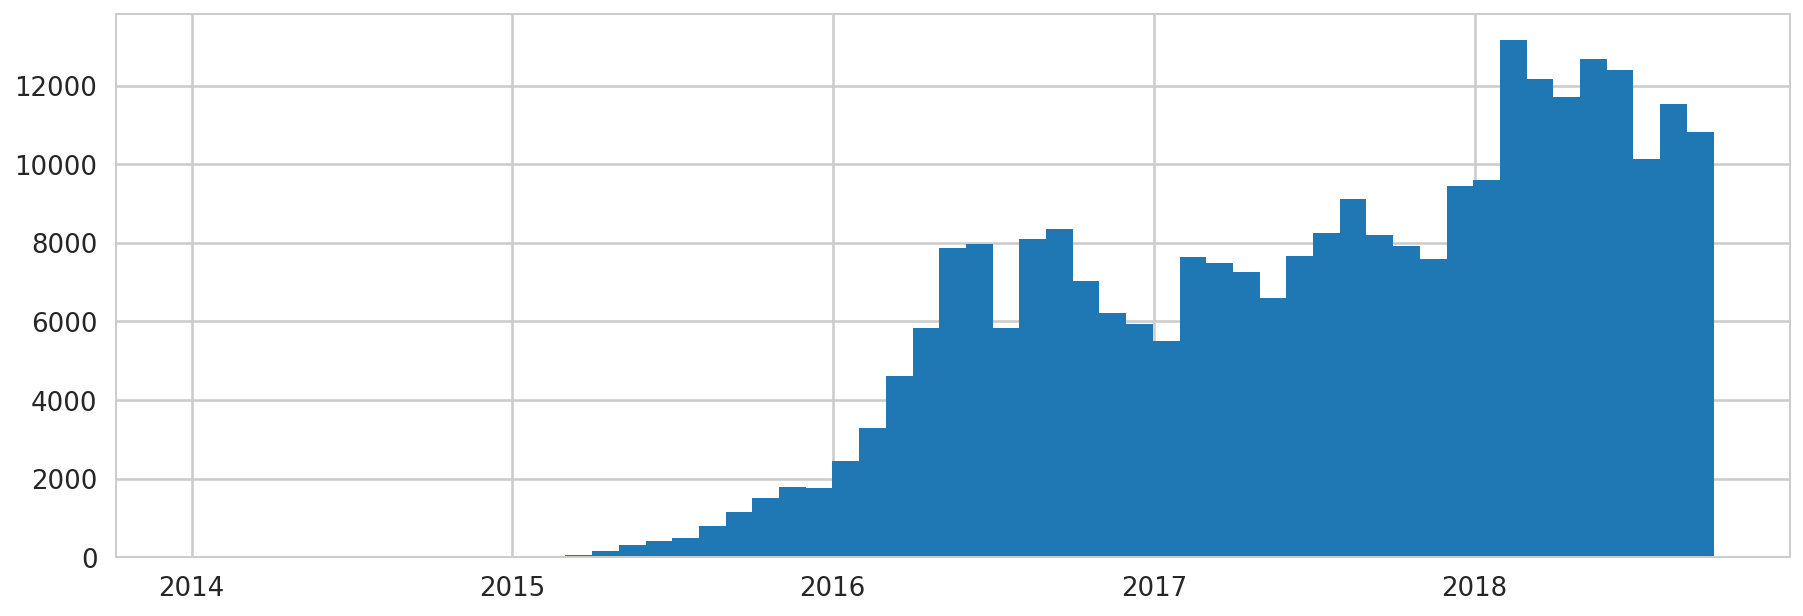

In [34]:
restaurants['INSPECTION DATE'].hist(
    range = ('1/1/2014','9/30/2018'), # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins = 57, # number of months in the range -- computed manually
    figsize = (15,5) # resize 15-width, 5-height
)

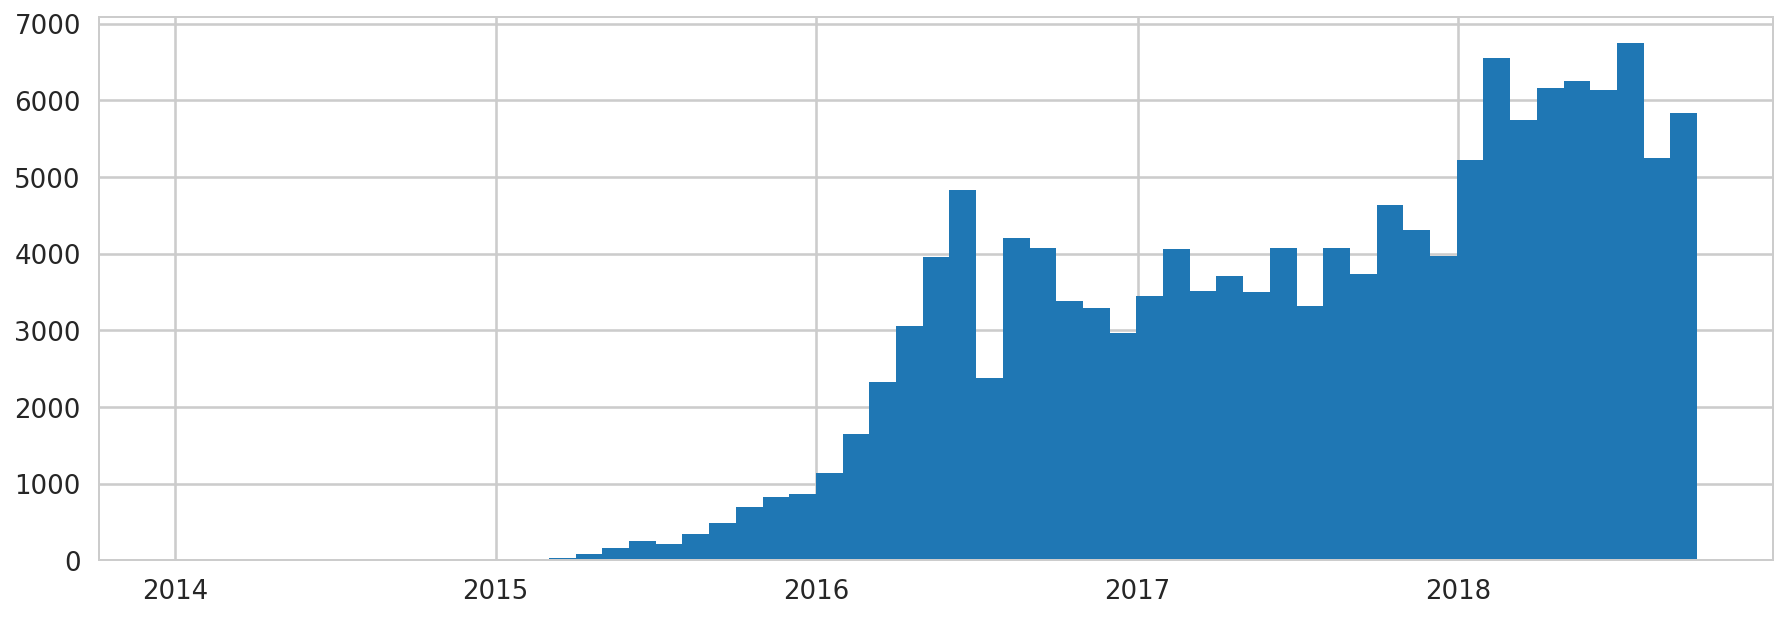

In [35]:
restaurants['GRADE DATE'].hist(
    range = ('1/1/2014','9/30/2018'), # limit the range of dates, ignore the 1/1/1990 faulty valye
    bins = 57, # number of months in the range -- computed manually
    figsize = (15,5) # resize 15-width, 5-height
)

### Categorical Variables

This is less important, but sometimes we want to specify variables to be "Categorical". This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).

In [36]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

### Analyzing the content of the columns

We can also get quick statistics about the common values that appear in each column:

In [37]:
restaurants["DBA"].value_counts()[:10] 

DUNKIN'                    4108
SUBWAY                     2961
STARBUCKS                  2093
MCDONALD'S                 2073
KENNEDY FRIED CHICKEN      1262
DUNKIN', BASKIN ROBBINS    1204
CROWN FRIED CHICKEN        1021
DOMINO'S                    999
BURGER KING                 951
POPEYES                     900
Name: DBA, dtype: int64

In [38]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:5]

American                                                            82332
Chinese                                                             40171
CafÃ©/Coffee/Tea                                                    18277
Pizza                                                               16913
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    16596
Name: CUISINE DESCRIPTION, dtype: int64

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

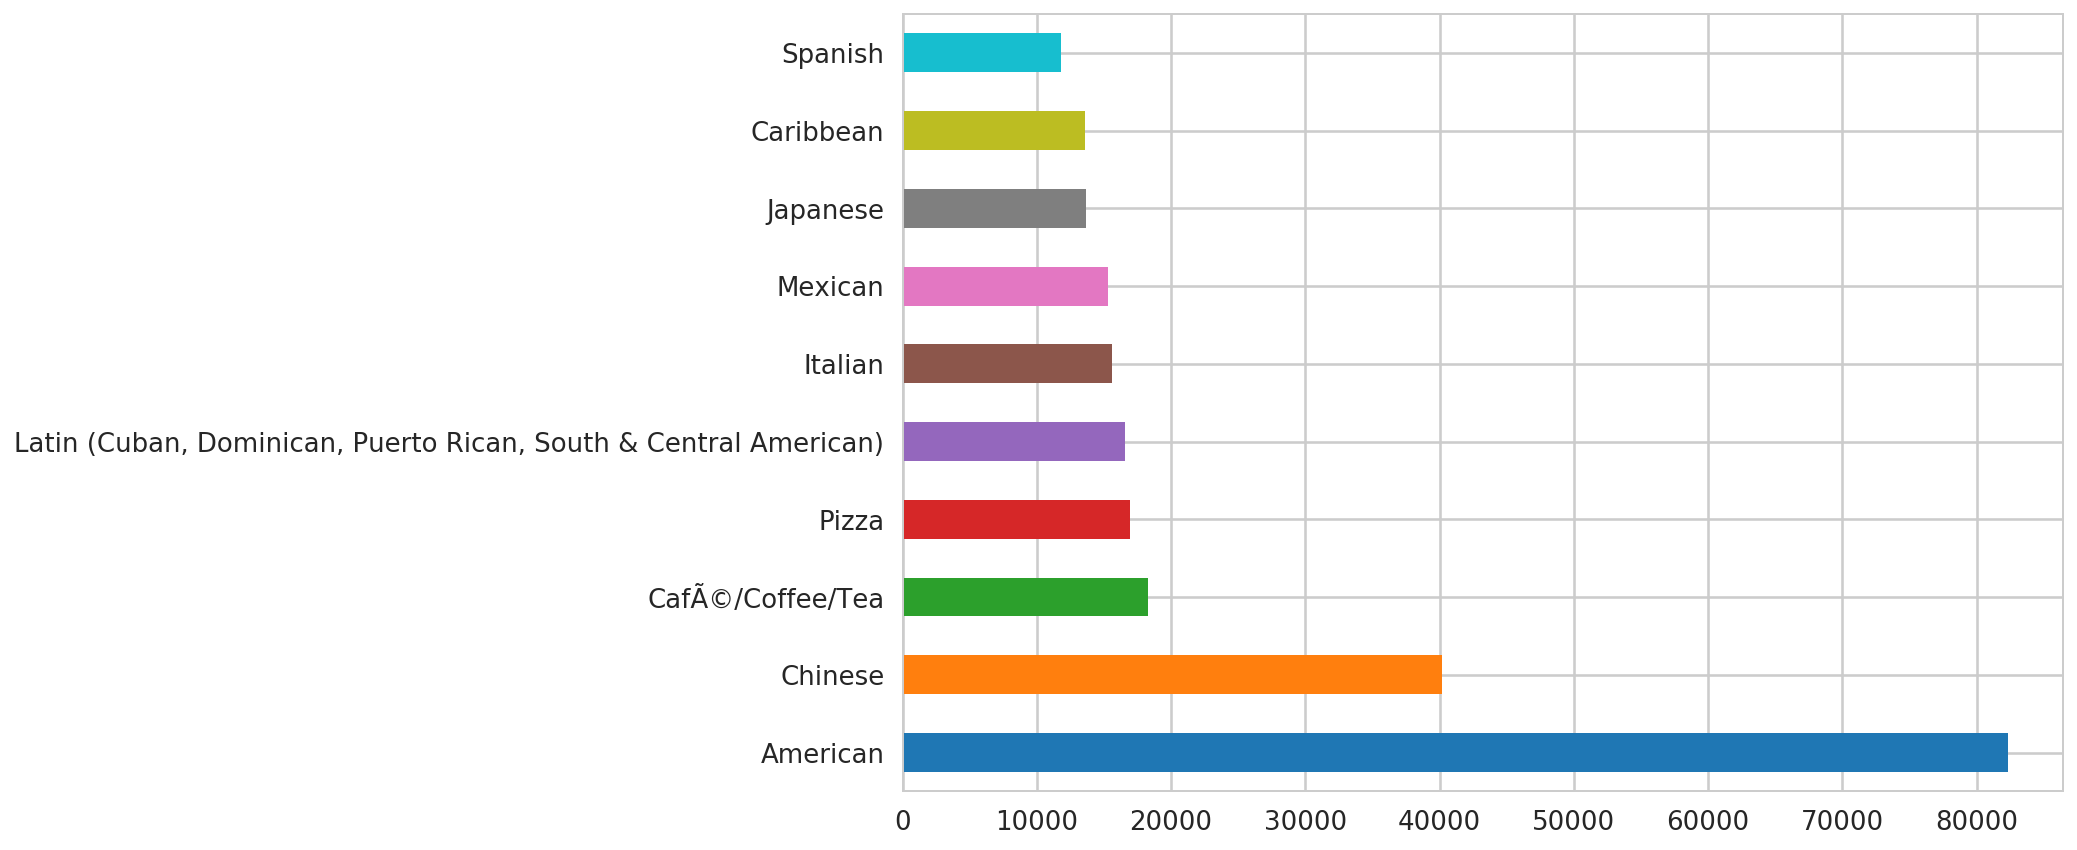

In [41]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:10].plot(kind='barh')

In [42]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular

American                                                            82332
Chinese                                                             40171
CafÃ©/Coffee/Tea                                                    18277
Pizza                                                               16913
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    16596
Italian                                                             15601
Mexican                                                             15263
Japanese                                                            13637
Caribbean                                                           13580
Spanish                                                             11785
Bakery                                                              11627
Pizza/Italian                                                        8409
Chicken                                                              6919
Indian                                

Hm, that does not look nice. Let's shorten the name of the cuisine for the _"Latin (Cuban, Dominican, Puerto Rican, South & Central American)"_ and replace it with _"Latin American"_. We will use the `replace` command in Pandas:

In [43]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
    value = 'Latin American',
    inplace=True
)

In [44]:
restaurants["CUISINE DESCRIPTION"].replace(
    to_replace='CafÃ©/Coffee/Tea',
    value = 'Cafe/Coffee/Tea',
    inplace=True
)


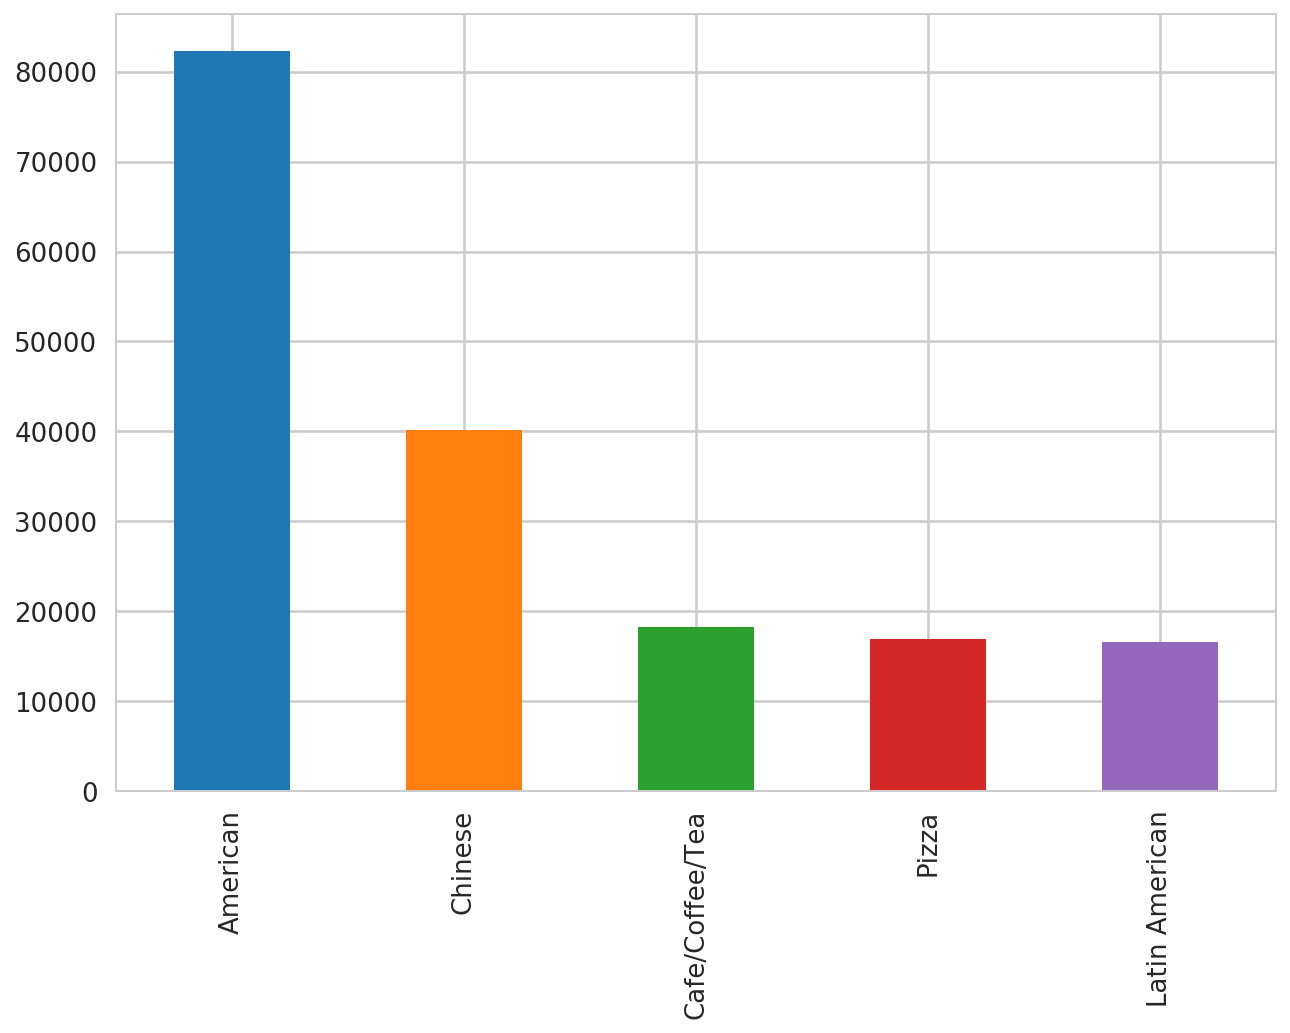

In [45]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:5].plot(kind='bar')

In [46]:
restaurants["VIOLATION CODE"].head(5)

0    04L
1    08A
2    08C
3    10E
4    10F
Name: VIOLATION CODE, dtype: category
Categories (99, object): [02A, 02B, 02C, 02D, ..., 22C, 22E, 22F, 22G]

In [47]:
violation_counts = restaurants["VIOLATION CODE"].value_counts();
violation_counts[0:10]

10F    54324
08A    41416
04L    28753
06D    26316
06C    24734
10B    22852
02G    22046
02B    19986
04N    19085
04H     8080
Name: VIOLATION CODE, dtype: int64

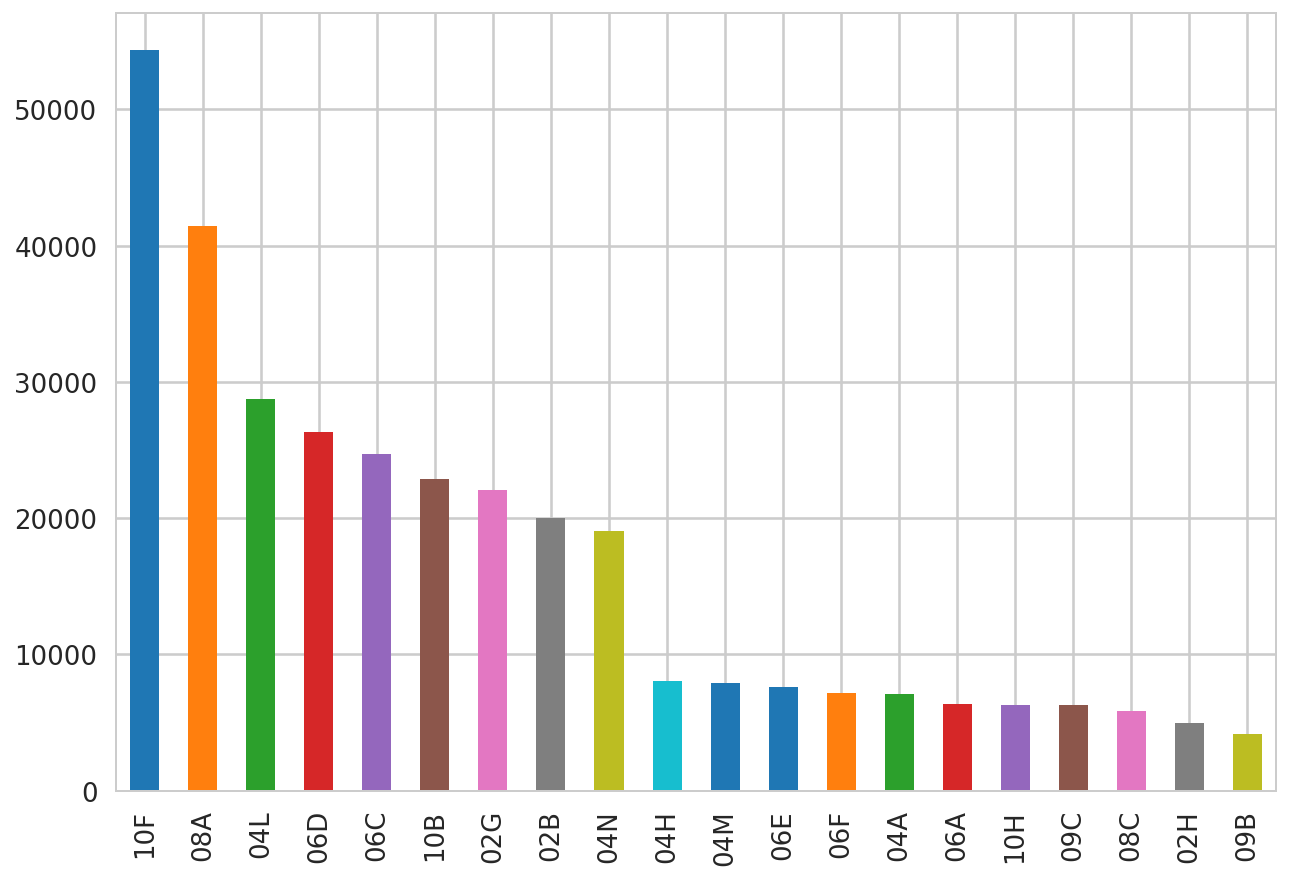

In [48]:
violation_counts[0:20].plot(kind='bar')

In [49]:
restaurants.keys()

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [62]:
restaurants[restaurants["CUISINE DESCRIPTION"]=="Basque"]

CAMIS                                                DBA  \
323401  50060497  ORTZI RESTAURANT AND BAR LOCATED INSIDE LOUMA ...   
323402  50060497  ORTZI RESTAURANT AND BAR LOCATED INSIDE LOUMA ...   
323403  50060497  ORTZI RESTAURANT AND BAR LOCATED INSIDE LOUMA ...   
323404  50060497  ORTZI RESTAURANT AND BAR LOCATED INSIDE LOUMA ...   
323405  50060497  ORTZI RESTAURANT AND BAR LOCATED INSIDE LOUMA ...   
323406  50060497  ORTZI RESTAURANT AND BAR LOCATED INSIDE LOUMA ...   
323407  50060497  ORTZI RESTAURANT AND BAR LOCATED INSIDE LOUMA ...   

             BORO BUILDING     STREET ZIPCODE       PHONE CUISINE DESCRIPTION  \
323401  MANHATTAN      120  W 41ST ST   10036  2127308900              Basque   
323402  MANHATTAN      120  W 41ST ST   10036  2127308900              Basque   
323403  MANHATTAN      120  W 41ST ST   10036  2127308900              Basque   
323404  MANHATTAN      120  W 41ST ST   10036  2127308900              Basque   
323405  MANHATTAN      120  W 41ST ST   10036  2127308900              Basque   
323406  MANHATTAN      120  W 41ST ST   10036  2127308900              Basque   
323407  MANHATTAN      120  W 41ST ST   10036  2127308900              Basque   

       INSPECTION DATE                                           ACTION  \
323401      2019-02-21  Violations were cited in the following area(s).   
323402      2019-02-21  Violations were cited in the following area(s).   
323403      2017-10-17  Violations were cited in the following area(s).   
323404      2017-10-17  Violations were cited in the following area(s).   
323405      2017-04-04  Violations were cited in the following area(s).   
323406      2017-04-04  Violations were cited in the following area(s).   
323407      2017-04-04  Violations were cited in the following area(s).   

       VIOLATION CODE                              VIOLATION DESCRIPTION  \
323401            02H  Food not cooled by an approved method whereby ...   
323402            06A  Personal cleanliness inadequate. Outer garment...   
323403            06D  Food contact surface not properly washed, rins...   
323404            10B  Plumbing not properly installed or maintained;...   
323405            10B  Plumbing not properly installed or maintained;...   
323406            22A  Nuisance created or allowed to exist. Facility...   
323407            22E    ROP processing equipment not approved by DOHMH.   

       CRITICAL FLAG  SCORE GRADE GRADE DATE RECORD DATE  \
323401      Critical   13.0     A 2019-02-21  2019-05-28   
323402      Critical   13.0     A 2019-02-21  2019-05-28   
323403      Critical    7.0     A 2017-10-17  2019-05-28   
323404  Not Critical    7.0     A 2017-10-17  2019-05-28   
323405  Not Critical    3.0   NaN        NaT  2019-05-28   
323406  Not Critical    NaN   NaN        NaT  2019-05-28   
323407  Not Critical    NaN   NaN        NaT  2019-05-28   

                                          INSPECTION TYPE  
323401              Cycle Inspection / Initial Inspection  
323402              Cycle Inspection / Initial Inspection  
323403              Cycle Inspection / Initial Inspection  
323404              Cycle Inspection / Initial Inspection  
323405  Pre-permit (Non-operational) / Initial Inspection  
323406  Administrative Miscellaneous / Initial Inspection  
323407  Administrative Miscellaneous / Initial Inspection

#### Exercise

* Create a plot showing the number of inspections that happen across **boroughs**. Use the `BORO` column and the `value_counts()` function.

In [ ]:
# your code here

#### Solution 

In [ ]:
restaurants['BORO'].value_counts()

In [ ]:
# Same as above; works only for attribute names without spaces
restaurants.BORO.value_counts()

In [ ]:
restaurants['BORO'].value_counts().plot(kind='bar')

In [ ]:
restaurants['BORO'].value_counts().plot(kind='barh')

### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [55]:
restaurants[ ["DBA", "GRADE", "GRADE DATE"] ]

DBA GRADE GRADE DATE
0       MORRIS PARK BAKE SHOP   NaN        NaT
1       MORRIS PARK BAKE SHOP   NaN        NaT
2       MORRIS PARK BAKE SHOP   NaN        NaT
3       MORRIS PARK BAKE SHOP   NaN        NaT
4       MORRIS PARK BAKE SHOP   NaN        NaT
5       MORRIS PARK BAKE SHOP     A 2018-05-11
6       MORRIS PARK BAKE SHOP     A 2018-05-11
7       MORRIS PARK BAKE SHOP     A 2017-05-18
8       MORRIS PARK BAKE SHOP     A 2017-05-18
9                     WENDY'S     A 2019-03-04
10                    WENDY'S     A 2019-03-04
11                    WENDY'S     A 2019-03-04
12                    WENDY'S     A 2018-03-13
13                    WENDY'S     A 2018-03-13
14                    WENDY'S     A 2018-03-13
15                    WENDY'S     A 2017-10-06
16                    WENDY'S     A 2017-10-06
17                    WENDY'S   NaN        NaT
18                    WENDY'S     A 2016-10-27
19                    WENDY'S     A 2016-10-27
20                    WENDY'S   NaN        NaT
21                    WENDY'S   NaN        NaT
22                    WENDY'S   NaN        NaT
23                    WENDY'S   NaN        NaT
24                    WENDY'S   NaN        NaT
25                    WENDY'S     A 2016-04-30
26                    WENDY'S     A 2016-04-30
27                    WENDY'S     A 2016-04-30
28                    WENDY'S     A 2016-04-30
29                    WENDY'S   NaN        NaT
...                       ...   ...        ...
384428                    NaN   NaN        NaT
384429                    NaN   NaN        NaT
384430                    NaN   NaN        NaT
384431        MISSION CEVICHE   NaN        NaT
384432                    NaN   NaN        NaT
384433             BAR ITALIA   NaN        NaT
384434            NEW KENNEDY   NaN        NaT
384435                    NaN   NaN        NaT
384436                    NaN   NaN        NaT
384437                    NaN   NaN        NaT
384438           1290 6TH AVE   NaN        NaT
384439                    NaN   NaN        NaT
384440               WOK CITY   NaN        NaT
384441              LOCK YARD   NaN        NaT
384442                    NaN   NaN        NaT
384443               SAN LOCO   NaN        NaT
384444                    NaN   NaN        NaT
384445                    NaN   NaN        NaT
384446      LA CASA DEL POLLO   NaN        NaT
384447           TRI DIM WEST   NaN        NaT
384448     RAICES COLOMBIANAS   NaN        NaT
384449                    NaN   NaN        NaT
384450        VIDA ENERJETICA   NaN        NaT
384451          DUNKIN DONUTS   NaN        NaT
384452                    NaN   NaN        NaT
384453                 &PIZZA   NaN        NaT
384454             JONGRO BBQ   NaN        NaT
384455                    NaN   NaN        NaT
384456               PEPERINO   NaN        NaT
384457             FOODSTRUCK   NaN        NaT

[384458 rows x 3 columns]

In [56]:
columns = ["GRADE DATE","VIOLATION CODE", "DBA", "SCORE"]
restaurants[ columns ].head(10)

GRADE DATE VIOLATION CODE                    DBA  SCORE
0        NaT            04L  MORRIS PARK BAKE SHOP   18.0
1        NaT            08A  MORRIS PARK BAKE SHOP   18.0
2        NaT            08C  MORRIS PARK BAKE SHOP   18.0
3        NaT            10E  MORRIS PARK BAKE SHOP   18.0
4        NaT            10F  MORRIS PARK BAKE SHOP   18.0
5 2018-05-11            08C  MORRIS PARK BAKE SHOP    5.0
6 2018-05-11            10F  MORRIS PARK BAKE SHOP    5.0
7 2017-05-18            06D  MORRIS PARK BAKE SHOP    7.0
8 2017-05-18            10F  MORRIS PARK BAKE SHOP    7.0
9 2019-03-04            02G                WENDY'S   13.0

In [57]:
restaurants[ ["GRADE DATE","VIOLATION CODE", "DBA", "SCORE"] ].head(10)

GRADE DATE VIOLATION CODE                    DBA  SCORE
0        NaT            04L  MORRIS PARK BAKE SHOP   18.0
1        NaT            08A  MORRIS PARK BAKE SHOP   18.0
2        NaT            08C  MORRIS PARK BAKE SHOP   18.0
3        NaT            10E  MORRIS PARK BAKE SHOP   18.0
4        NaT            10F  MORRIS PARK BAKE SHOP   18.0
5 2018-05-11            08C  MORRIS PARK BAKE SHOP    5.0
6 2018-05-11            10F  MORRIS PARK BAKE SHOP    5.0
7 2017-05-18            06D  MORRIS PARK BAKE SHOP    7.0
8 2017-05-18            10F  MORRIS PARK BAKE SHOP    7.0
9 2019-03-04            02G                WENDY'S   13.0

### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [9]:
restaurants

NameError: name 'restaurants' is not defined

In [60]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12         True
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
384428    False
384429    False
384430    False
384431    False
384432    False
384433    False
384434    False
384435    False
384436    False
384437    False
384438    False
384439    False
384440    False
384441    False
384442    False
384443    False
384444    False
384445    False
384446    False
384447    False
384448    False
384449    False
384450    False
384451    False
384452    False
384453    False
384454    False
384455    False
384456    False
384457    False
Name: VIOLATION CODE, Le

In [61]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice
has_mice = restaurants[mice]
has_mice

CAMIS                             DBA           BORO BUILDING  \
0       30075445           MORRIS PARK BAKE SHOP          BRONX     1007   
12      30112340                         WENDY'S       BROOKLYN      469   
32      30191841  DJ REYNOLDS PUB AND RESTAURANT      MANHATTAN      351   
60      40356151         BRUNOS ON THE BOULEVARD         QUEENS     8825   
67      40356483              WILKEN'S FINE FOOD       BROOKLYN     7114   
70      40356731     TASTE THE TROPICS ICE CREAM       BROOKLYN     1839   
74      40356731     TASTE THE TROPICS ICE CREAM       BROOKLYN     1839   
80      40357217                       WILD ASIA          BRONX     2300   
109     40360045                     SEUDA FOODS       BROOKLYN      705   
112     40360045                     SEUDA FOODS       BROOKLYN      705   
117     40360045                     SEUDA FOODS       BROOKLYN      705   
119     40360045                     SEUDA FOODS       BROOKLYN      705   
123     40360076                CARVEL ICE CREAM       BROOKLYN      203   
146     40361618                      SAL'S DELI         QUEENS    12908   
153     40361618                      SAL'S DELI         QUEENS    12908   
157     40361618                      SAL'S DELI         QUEENS    12908   
193     40362274            ANGELIKA FILM CENTER      MANHATTAN       18   
196     40362274            ANGELIKA FILM CENTER      MANHATTAN       18   
201     40362274            ANGELIKA FILM CENTER      MANHATTAN       18   
208     40362274            ANGELIKA FILM CENTER      MANHATTAN       18   
213     40362274            ANGELIKA FILM CENTER      MANHATTAN       18   
220     40362432               HO MEI RESTAURANT         QUEENS    10305   
223     40362432               HO MEI RESTAURANT         QUEENS    10305   
228     40362432               HO MEI RESTAURANT         QUEENS    10305   
292     40363098                         DUNKIN'       BROOKLYN       56   
295     40363098                         DUNKIN'       BROOKLYN       56   
298     40363098                         DUNKIN'       BROOKLYN       56   
304     40363098                         DUNKIN'       BROOKLYN       56   
347     40363565                      HOT BAGELS         QUEENS     7905   
386     40363630       LORENZO & MARIA'S KITCHEN      MANHATTAN     1418   
...          ...                             ...            ...      ...   
383225  50090094                        CAMELLIA      MANHATTAN      153   
383246  50090118               DA E NET 777 CAFE       BROOKLYN     1223   
383262  50090198                 THAI PEPPERCORN      MANHATTAN     1406   
383266  50090198                 THAI PEPPERCORN      MANHATTAN     1406   
383329  50090318    RINCON LATINO 103 RESTAURANT         QUEENS     3912   
383343  50090327                       ADDICCION  STATEN ISLAND      308   
383428  50090463              NUAN XIN RICE ROLL      MANHATTAN      67A   
383441  50090488              THE HEADLESS WIDOW      MANHATTAN       99   
383477  50090557                     MATSU SUSHI      MANHATTAN      411   
383538  50090719                     ELA TAVERNA       BROOKLYN       98   
383545  50090719                     ELA TAVERNA       BROOKLYN       98   
383560  50090748                      TRIPLE RED       BROOKLYN     2122   
383594  50090890                     KUNG FU TEA       BROOKLYN     8625   
383612  50090903                VEE'S RESTAURANT       BROOKLYN      896   
383623  50090920                 THE VILLAGE DEN      MANHATTAN      225   
383662  50091025                       PINKBERRY      MANHATTAN     2873   
383666  50091031                       PINKBERRY      MANHATTAN     2041   
383695  50091096              BENARES RESTAURANT      MANHATTAN       45   
383757  50091290                NANA THAI STREET      MANHATTAN       31   
383825  50091455                272 UPTOWN PIZZA      MANHATTAN      272   
383831  50091461      BAY PARKWAY SEAFOOD PALACE       BROO

In [63]:
restaurants["DBA"].value_counts()[:10]

DUNKIN'                    4108
SUBWAY                     2961
STARBUCKS                  2093
MCDONALD'S                 2073
KENNEDY FRIED CHICKEN      1262
DUNKIN', BASKIN ROBBINS    1204
CROWN FRIED CHICKEN        1021
DOMINO'S                    999
BURGER KING                 951
POPEYES                     900
Name: DBA, dtype: int64

In [64]:
# List the most frequent DBA values in the dataframe
has_mice["DBA"].value_counts()[:20]

SUBWAY                                   239
DUNKIN'                                  150
KENNEDY FRIED CHICKEN                    119
CROWN FRIED CHICKEN                      106
STARBUCKS                                 83
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     76
POPEYES                                   72
MCDONALD'S                                67
DOMINO'S                                  63
DUNKIN', BASKIN ROBBINS                   58
BURGER KING                               56
KFC                                       38
CARVEL ICE CREAM                          34
LITTLE CAESARS                            33
LE PAIN QUOTIDIEN                         31
AMC THEATRES                              28
VIVI BUBBLE TEA                           26
BAREBURGER                                21
EMPANADAS MONUMENTAL                      21
PAPA JOHN'S                               20
Name: DBA, dtype: int64

In [65]:
has_mice["CAMIS"].value_counts()[:5]

50016943    12
41259444    11
50036890    11
50001192    11
41465002    11
Name: CAMIS, dtype: int64

In [66]:
condition = (has_mice["CAMIS"] == '41259444')
has_mice[condition]

CAMIS                   DBA      BORO BUILDING    STREET ZIPCODE  \
81274  41259444  COCO ROCO RESTAURANT  BROOKLYN      392  5 AVENUE   11215   
81279  41259444  COCO ROCO RESTAURANT  BROOKLYN      392  5 AVENUE   11215   
81283  41259444  COCO ROCO RESTAURANT  BROOKLYN      392  5 AVENUE   11215   
81286  41259444  COCO ROCO RESTAURANT  BROOKLYN      392  5 AVENUE   11215   
81288  41259444  COCO ROCO RESTAURANT  BROOKLYN      392  5 AVENUE   11215   
81292  41259444  COCO ROCO RESTAURANT  BROOKLYN      392  5 AVENUE   11215   
81296  41259444  COCO ROCO RESTAURANT  BROOKLYN      392  5 AVENUE   11215   
81301  41259444  COCO ROCO RESTAURANT  BROOKLYN      392  5 AVENUE   11215   
81304  41259444  COCO ROCO RESTAURANT  BROOKLYN      392  5 AVENUE   11215   
81309  41259444  COCO ROCO RESTAURANT  BROOKLYN      392  5 AVENUE   11215   
81316  41259444  COCO ROCO RESTAURANT  BROOKLYN      392  5 AVENUE   11215   

            PHONE CUISINE DESCRIPTION INSPECTION DATE  \
81274  7189653376            Peruvian      2019-02-11   
81279  7189653376            Peruvian      2018-12-17   
81283  7189653376            Peruvian      2018-07-25   
81286  7189653376            Peruvian      2018-06-08   
81288  7189653376            Peruvian      2018-06-05   
81292  7189653376            Peruvian      2017-12-19   
81296  7189653376            Peruvian      2017-10-30   
81301  7189653376            Peruvian      2017-03-30   
81304  7189653376            Peruvian      2017-03-09   
81309  7189653376            Peruvian      2016-09-07   
81316  7189653376            Peruvian      2016-07-11   

                                                  ACTION VIOLATION CODE  \
81274  Establishment Closed by DOHMH.  Violations wer...            04L   
81279    Violations were cited in the following area(s).            04L   
81283    Violations were cited in the following area(s).            04L   
81286                   Establishment re-opened by DOHMH            04L   
81288  Establishment Closed by DOHMH.  Violations wer...            04L   
81292    Violations were cited in the following area(s).            04L   
81296    Violations were cited in the following area(s).            04L   
81301    Violations were cited in the following area(s).            04L   
81304    Violations were cited in the following area(s).            04L   
81309    Violations were cited in the following area(s).            04L   
81316  Establishment Closed by DOHMH.  Violations wer...            04L   

                                   VIOLATION DESCRIPTION CRITICAL FLAG  SCORE  \
81274  Evidence of mice or live mice present in facil...      Critical   75.0   
81279  Evidence of mice or live mice present in facil...      Critical   12.0   
81283  Evidence of mice or live mice present in facil...      Critical   11.0   
81286  Evidence of mice or live mice present in facil...      Critical    9.0   
81288  Evidence of mice or live mice present in facil...      Critical   43.0   
81292  Evidence of mice or live mice present in facil...      Critical   12.0   
81296  Evidence of mice or live mice present in facil...      Critical   46.0   
81301  Evidence of mice or live mice present in facil...      Critical   12.0   
81304  Evidence of mice or live mice present in facil...      Critical   17.0   
81309  Evidence of mice or live mice present in facil...      Critical   23.0   
81316  Evidence of mice or live mice present in facil...      Critical   32.0   

      GRADE GRADE DATE RECORD DATE                          INSPECTION TYPE  
81274   NaN        NaT  2019-05-28         Cycle Inspection / Re-inspection  
81279   NaN        NaT  2019-05-28    Cycle Inspection / Initial Inspection  
81283     A 2018-07-25  2019-05-28         Cycle Inspection / Re-inspection  
81286   NaN 2018-06-08  2019-05-28  Cycle Inspection / Reopening Inspection  
81288   NaN        NaT  2019-05-28    Cycle Inspection / Initial Inspection  
81292     A 2017-12-19  2019-05-28         Cyc

And we can use more complex conditions. 

In [21]:
mice_manhattan =  ( (restaurants["VIOLATION CODE"] == "04L") 
                    & (restaurants["BORO"] == "MANHATTAN") 
                    & (restaurants["ZIPCODE"] == "10023") )

In [22]:
has_mice_10012 = restaurants[mice_manhattan]
has_mice_10012

CAMIS                              DBA       BORO BUILDING  \
433     40363945                         DOMINO'S  MANHATTAN      148   
4907    40373937                         SHUN LEE  MANHATTAN       37   
4913    40373937                         SHUN LEE  MANHATTAN       37   
4919    40373937                         SHUN LEE  MANHATTAN       37   
4927    40373937                         SHUN LEE  MANHATTAN       37   
4943    40373937                         SHUN LEE  MANHATTAN       37   
5829    40377789                  CAFE LUXEMBOURG  MANHATTAN      200   
7973    40386556              WESTSIDE RESTAURANT  MANHATTAN     2020   
9749    40391154                        MALACHY'S  MANHATTAN      103   
11658   40394749                  FINE & SCHAPIRO  MANHATTAN      138   
11662   40394749                  FINE & SCHAPIRO  MANHATTAN      138   
11669   40394749                  FINE & SCHAPIRO  MANHATTAN      138   
11671   40394749                  FINE & SCHAPIRO  MANHATTAN      138   
11674   40394749                  FINE & SCHAPIRO  MANHATTAN      138   
16055   40401834            COLUMBUS GOURMET FOOD  MANHATTAN      261   
16058   40401834            COLUMBUS GOURMET FOOD  MANHATTAN      261   
17829   40510341                  THE MUFFIN CAFE  MANHATTAN      222   
17836   40510341                  THE MUFFIN CAFE  MANHATTAN      222   
17841   40510341                  THE MUFFIN CAFE  MANHATTAN      222   
17844   40510341                  THE MUFFIN CAFE  MANHATTAN      222   
17852   40510341                  THE MUFFIN CAFE  MANHATTAN      222   
17856   40510341                  THE MUFFIN CAFE  MANHATTAN      222   
17859   40510341                  THE MUFFIN CAFE  MANHATTAN      222   
17864   40510341                  THE MUFFIN CAFE  MANHATTAN      222   
17869   40510341                  THE MUFFIN CAFE  MANHATTAN      222   
18760   40513633                        ARTE CAFE  MANHATTAN      106   
18860   40515448         FREDDIE & PEPPER'S PIZZA  MANHATTAN      303   
18863   40515448         FREDDIE & PEPPER'S PIZZA  MANHATTAN      303   
18869   40515448         FREDDIE & PEPPER'S PIZZA  MANHATTAN      303   
18873   40515448         FREDDIE & PEPPER'S PIZZA  MANHATTAN      303   
...          ...                              ...        ...      ...   
313113  50057586  ZUCKER'S BAGELS AND SMOKED FISH  MANHATTAN      273   
313119  50057586  ZUCKER'S BAGELS AND SMOKED FISH  MANHATTAN      273   
313123  50057586  ZUCKER'S BAGELS AND SMOKED FISH  MANHATTAN      273   
313128  50057586  ZUCKER'S BAGELS AND SMOKED FISH  MANHATTAN      273   
313133  50057586  ZUCKER'S BAGELS AND SMOKED FISH  MANHATTAN      273   
313144  50057588             ELLA KITCHEN AND BAR  MANHATTAN      249   
329741  50063625                UTOPIA RESTAURANT  MANHATTAN      267   
329745  50063625                UTOPIA RESTAURANT  MANHATTAN      267   
331177  50064218                          TAP NYC  MANHATTAN      267   
332749  50064708                           'CESCA  MANHATTAN      166   
336928  50066347                      IZAKAYA IDA  MANHATTAN      141   
336935  50066347                      IZAKAYA IDA  MANHATTAN      141   
336939  50066347                      IZAKAYA IDA  MANHATTAN      141   
340096  50067618                    HAAGEN - DAZS  MANHATTAN      263   
340101  50067618                    HAAGEN - DAZS  MANHATTAN      263   
342752  50068537                  JOE & THE JUICE  MANHATTAN      247   
343165  50068836                          Da Capo  MANHATTAN      322   
347359  50070500                          RECOLTE  MANHATTAN      300   
347375  50070500                          RECOLTE  MANHATTAN      300   
351252  50071795                 BURRITO MARIACHI  MANHATTAN      146   
358834  50074284                   SALUMERIA ROSI  MANHATTAN      283   
358838  50074284                   SALUMERIA ROSI  MANHATTAN      283   
358844  50074284                   SALUMERIA ROSI  MANHATTAN      283

In [23]:
has_mice_10012["DBA"].value_counts()[:20]

THE MUFFIN CAFE                      9
La Dinastia Latin-Chinese Cuisine    7
SAPPHIRE INDIAN CUISINE              7
ZUCKER'S BAGELS AND SMOKED FISH      5
RAKU IT'S JAPANESE II                5
ALICE'S TEA CUP                      5
SHUN LEE                             5
PASHA TURKISH RESTAURANT             5
SOLE BISTRO ITALIANO                 5
FINE & SCHAPIRO                      5
ROSA MEXICANA                        5
BARRE CAFE AT STEPS                  4
LE PAIN QUOTiDIEN                    4
FREDDIE & PEPPER'S PIZZA             4
EMPIRE SZECHUAN KYOTO                3
NEW YORK INSTITUTE OF TECHNOLOGY     3
PICCOLO CAFE                         3
AMC THEATRES                         3
SALUMERIA ROSI                       3
BOULE & CHERIE                       3
Name: DBA, dtype: int64

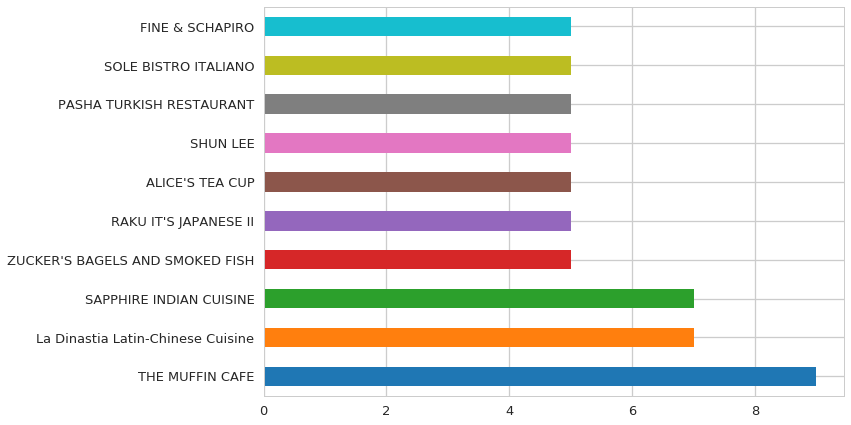

In [24]:
has_mice_10012["DBA"].value_counts()[:10].plot(kind='barh')

### Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) is one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [84]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'CAMIS',  # specifies the content of the cells
    aggfunc = 'count' # we ask to count how many different CAMIS values we see
)

In [85]:
pivot

CAMIS
INSPECTION DATE       
1900-01-01        1364
2011-10-07           1
2012-05-01           2
2013-04-19           4
2013-06-07           1
2013-06-12           4
2013-06-15           1
2013-10-22           2
2013-11-15           1
2014-03-06           1
2014-04-21           2
2014-07-21           1
2014-08-01           4
2014-08-27           2
2014-09-03           3
2014-09-13           4
2014-10-25           3
2014-10-29           2
2014-10-30           5
2014-10-31           4
2014-11-03           2
2014-11-22           1
2014-12-03           4
2014-12-05           5
2014-12-11           3
2014-12-23           5
2015-01-05           2
2015-01-06           4
2015-01-09           1
2015-01-14           5
...                ...
2019-04-22         679
2019-04-23         757
2019-04-24         803
2019-04-25         670
2019-04-26         462
2019-04-27          79
2019-04-29         769
2019-04-30         788
2019-05-01         842
2019-05-02         842
2019-05-03         528
2019-05-04         188
2019-05-06         751
2019-05-07         843
2019-05-08         841
2019-05-09         898
2019-05-10         472
2019-05-11         165
2019-05-13         752
2019-05-14         863
2019-05-15         816
2019-05-16         870
2019-05-17         448
2019-05-18         193
2019-05-20         832
2019-05-21         847
2019-05-22         822
2019-05-23         895
2019-05-24         514
2019-05-25         142

[1389 rows x 1 columns]

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

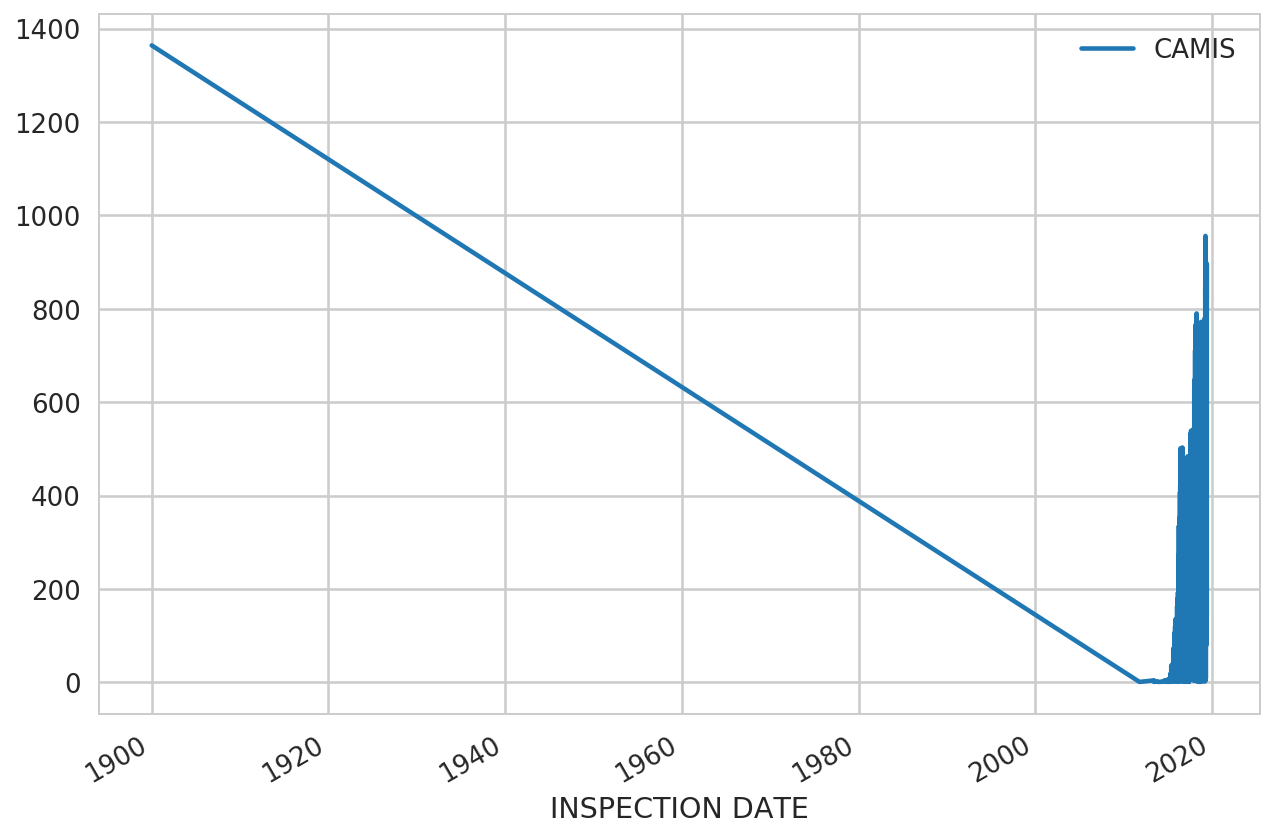

In [86]:
pivot.plot()

In [87]:
pivot.head(5)

CAMIS
INSPECTION DATE       
1900-01-01        1364
2011-10-07           1
2012-05-01           2
2013-04-19           4
2013-06-07           1

#### Deleting rows from a DataFrame

Hm, that '1900-01-01' line is messing things up. Let's delete it, using the `drop` command. Notice a few things:
* We use the `pd.to_datetime` command to convert the '1900-01-01' string into a datetime data type.
* We use the `axis='index'` parameter means that we delete a **row** with that index value. (The `axis='columns'` means that we delete a column.). Often you will see `axis=0` (equivalent to `axis='index'`) and `axis=1` (equivalent to `axis='columns'`).
* The `inplace=True` means that we change directly the dataframe, instead of returning a new dataframe that does not have the deleted value.

In [94]:
pivot.drop(pd.to_datetime('1900-01-01'), axis='index', inplace=True) 

In [95]:
pivot.head(5)

CAMIS
INSPECTION DATE       
2011-10-07           1
2012-05-01           2
2013-04-19           4
2013-06-07           1
2013-06-12           4

And let's plot again.

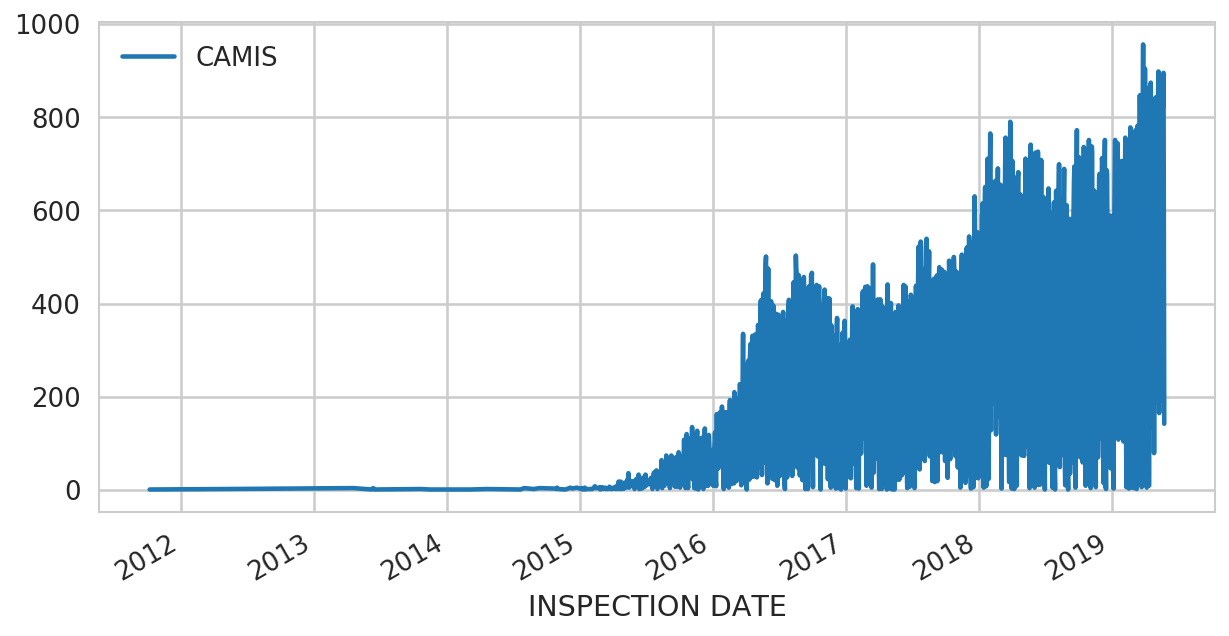

In [96]:
pivot.plot(figsize=(10,5))

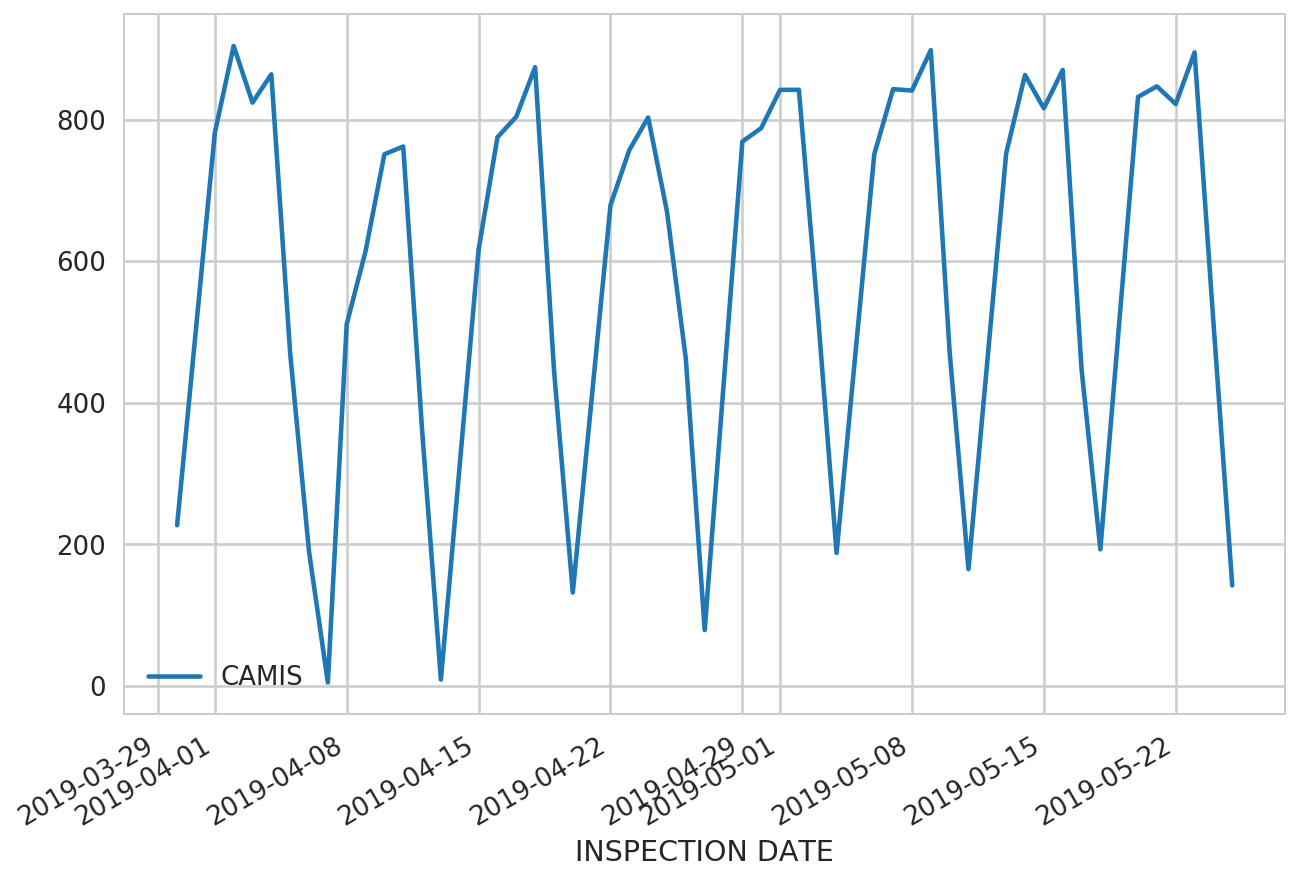

In [97]:
pivot.tail(50).plot()

#### Changing date granularity 

We can also use the [resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) command to change the frequency from one day, to, say, 7 days. Then we can compute, say, the average (`mean()`) for these days, or the total number (`sum()`) of inspections.

In [98]:
pivot.resample('1W').mean().tail(10)

CAMIS
INSPECTION DATE            
2019-03-24       530.285714
2019-03-31       694.666667
2019-04-07       576.857143
2019-04-14       501.500000
2019-04-21       608.000000
2019-04-28       575.000000
2019-05-05       659.500000
2019-05-12       661.666667
2019-05-19       657.000000
2019-05-26       675.333333

Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

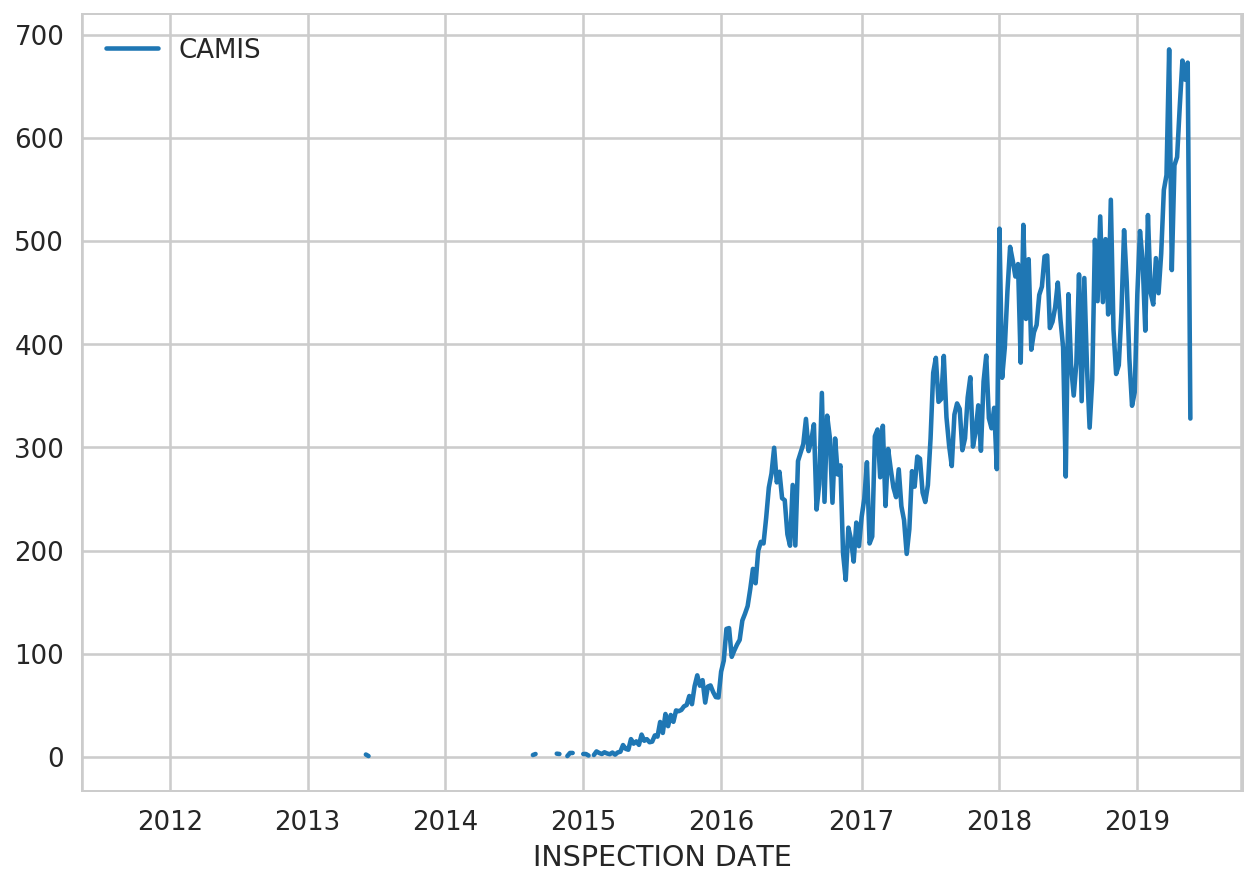

In [99]:
# Plot the average number of inspections, over 7-day periods
pivot.resample('7D').mean().plot()

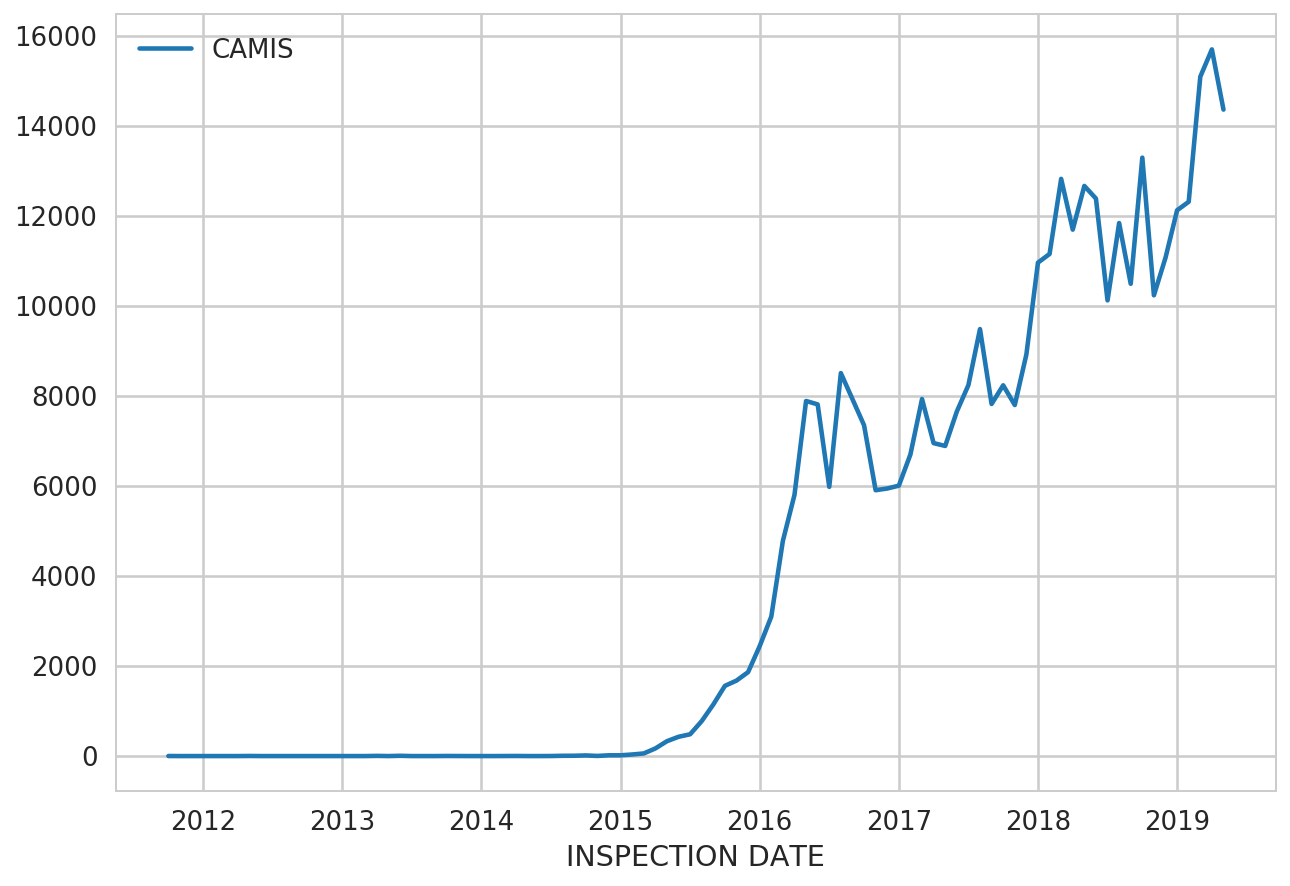

In [100]:
# Plot the total number of inspections, over 1-month periods
pivot.resample('1M').sum().plot()

Text(0.5, 1.0, 'Analysis of Number of Inspections over Time')

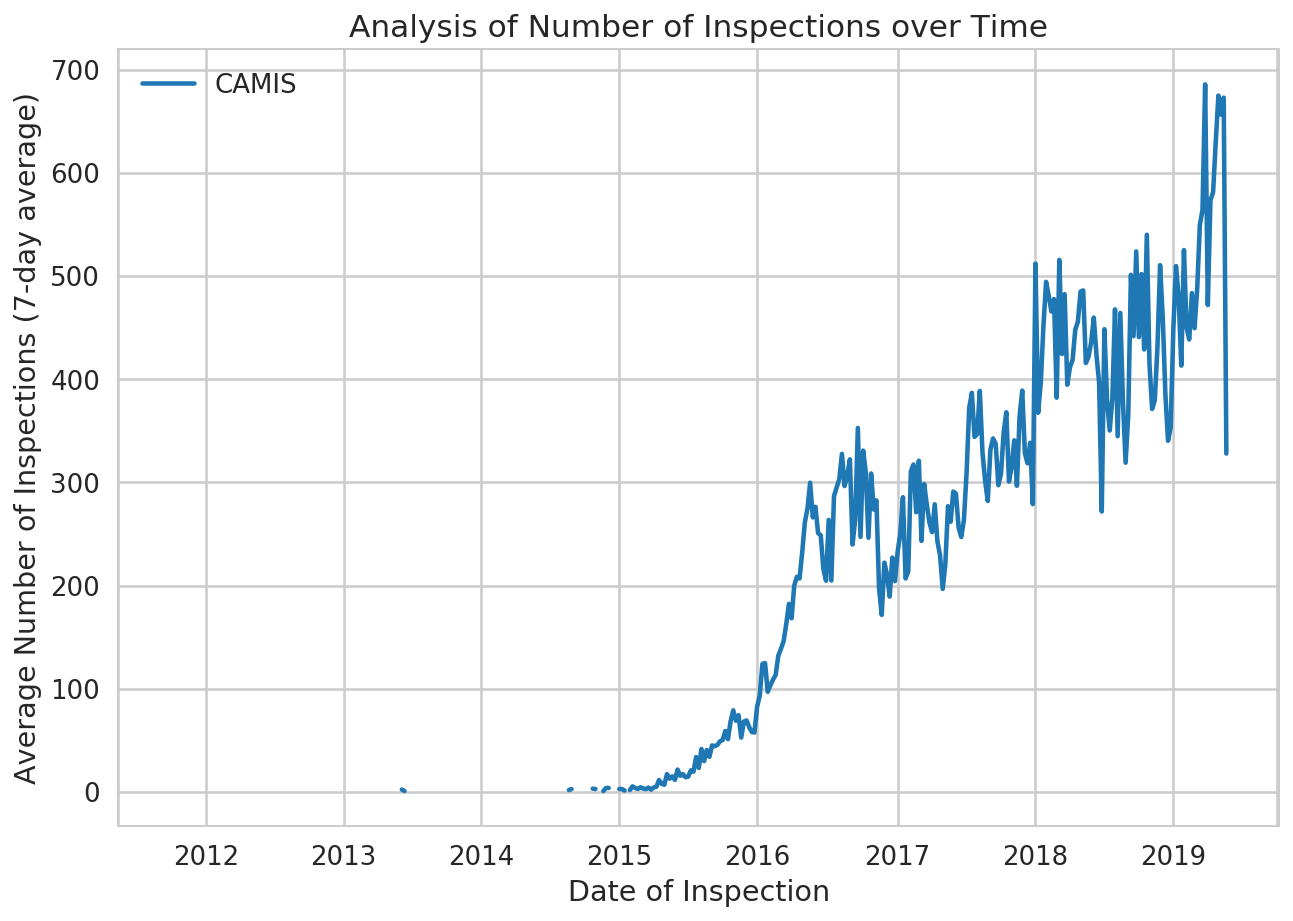

In [102]:
plot = pivot.resample('7D').mean().plot()
plot.set_xlabel("Date of Inspection")
plot.set_ylabel("Average Number of Inspections (7-day average)")
plot.set_title("Analysis of Number of Inspections over Time")

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `column` parameter.

In [103]:
pivot2 = pd.pivot_table(
    data = restaurants, #
    index = 'INSPECTION DATE', 
    columns = 'BORO', 
    values = 'CAMIS', 
    aggfunc = 'count'
)
pivot2.tail(10)

BORO             BRONX  BROOKLYN  MANHATTAN  Missing  QUEENS  STATEN ISLAND
INSPECTION DATE                                                            
2019-05-15        46.0     221.0      285.0      NaN   241.0           23.0
2019-05-16        63.0     256.0      254.0      NaN   277.0           20.0
2019-05-17        19.0     124.0      241.0      NaN    59.0            5.0
2019-05-18        27.0      48.0       60.0      NaN    57.0            1.0
2019-05-20        80.0     190.0      224.0      NaN   304.0           34.0
2019-05-21        49.0     357.0      289.0      NaN   129.0           23.0
2019-05-22       117.0     196.0      229.0      NaN   274.0            6.0
2019-05-23        84.0     298.0      291.0      NaN   190.0           32.0
2019-05-24        30.0     111.0      289.0      NaN    84.0            NaN
2019-05-25        24.0      56.0        8.0      NaN    54.0            NaN

##### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise, and the *'Missing'* columns the same. We can use the `drop` command of Pandas to drop these.

In [108]:
# The axis='index' (or axis=0) means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime('1900-01-01'), axis='index') 

In [109]:
# The axis='columns' (or axis=1) means that we delete a columns with that value
pivot2 = pivot2.drop('Missing', axis='columns')

In [110]:
pivot2.tail(5)

BORO             BRONX  BROOKLYN  MANHATTAN  QUEENS  STATEN ISLAND
INSPECTION DATE                                                   
2019-05-21        49.0     357.0      289.0   129.0           23.0
2019-05-22       117.0     196.0      229.0   274.0            6.0
2019-05-23        84.0     298.0      291.0   190.0           32.0
2019-05-24        30.0     111.0      289.0    84.0            NaN
2019-05-25        24.0      56.0        8.0    54.0            NaN

In [111]:
# We resample the index, to keep only dates every one month
# For that one month period, we compute the average value
pivot2.resample('1M').mean().tail(10)

BORO                 BRONX    BROOKLYN   MANHATTAN      QUEENS  STATEN ISLAND
INSPECTION DATE                                                              
2018-08-31       47.384615   93.250000  198.280000   94.000000      25.250000
2018-09-30       39.708333  106.920000  178.521739   97.458333      22.263158
2018-10-31       43.615385  130.111111  193.653846  119.962963      22.117647
2018-11-30       33.227273  109.208333  169.833333  111.869565      16.928571
2018-12-31       39.375000  108.538462  194.333333  114.269231      15.875000
2019-01-31       40.916667  124.480000  203.217391  116.846154      15.700000
2019-02-28       52.238095  129.304348  201.666667  118.833333      30.500000
2019-03-31       61.769231  140.814815  215.800000  140.074074      22.173913
2019-04-30       54.480000  153.230769  233.038462  147.038462      24.842105
2019-05-31       59.181818  174.136364  232.818182  172.954545      17.823529

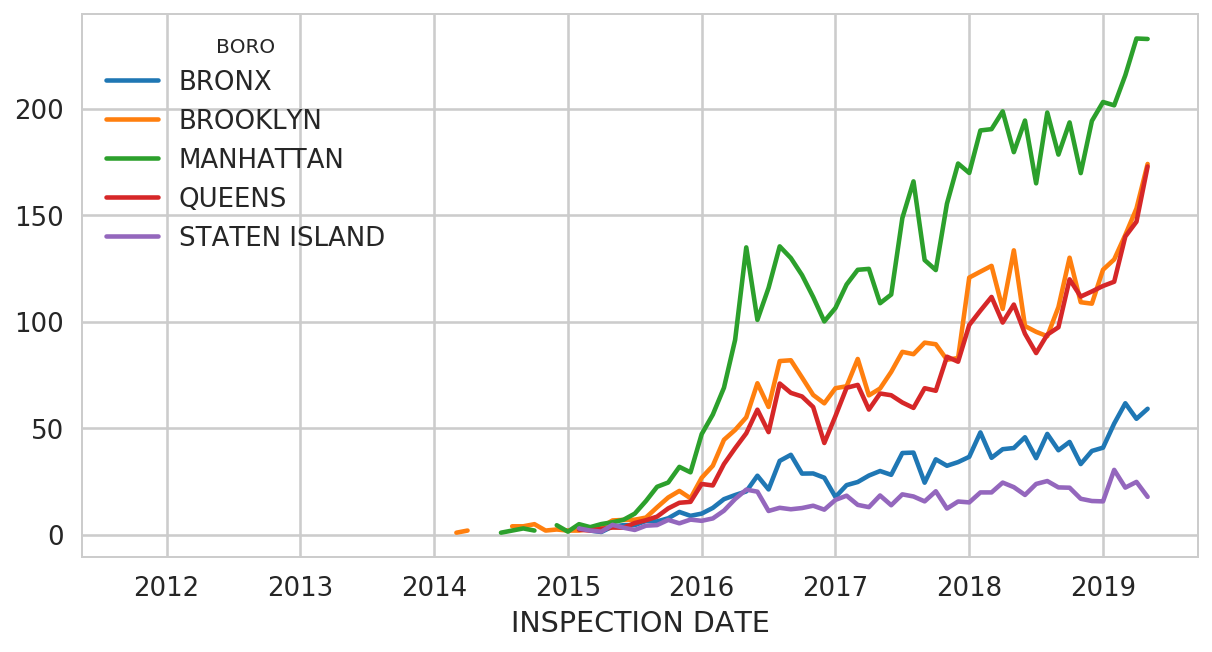

In [112]:
# If we plot a dataframe then by default the index column
# in our case the INSPECTION DATE becomes the x-asis
# and all the columns become separate lines in the plot
pivot2.resample('1M').mean().plot(figsize=(10,5))

# Potential Exercise, if we have time: 
# Drop the last date, which corresponds to an incomplete month

### (Optional, FYI) Advanced Pivot Tables

We can also add multiple attributes in the index and columns. It is also possible to have multiple aggregation functions, and we can even define our own aggregation functions.

In [113]:
# We write a function that returns the 
# number of unique items in a list x 
def count_unique(x):
    return len(set(x))

# We break down by BORO and GRADE, and also calculate 
# inspections in unique (unique restaurants) 
# and non-unique entries (effectuvely, violations)
pivot_advanced = pd.pivot_table(
    data = restaurants, #
    index = 'GRADE DATE', 
    columns = ['BORO', 'GRADE'],
    values = 'CAMIS', 
    aggfunc = ['count', count_unique]
)

# Take the total number of inspections (unique and non-unique)
agg = pivot_advanced.resample('1M').sum()

# Show the last 5 entries and show the transpose (.T) 
agg.tail().T

GRADE DATE                        2019-01-31  2019-02-28  2019-03-31  \
             BORO          GRADE                                       
count        BRONX         A           411.0       404.0       551.0   
                           B            76.0        80.0        81.0   
                           C            49.0        33.0        11.0   
             BROOKLYN      A          1135.0      1184.0      1396.0   
                           B           208.0       178.0       140.0   
                           C            83.0        75.0        29.0   
             MANHATTAN     A          1889.0      2005.0      2118.0   
                           B           280.0       303.0       200.0   
                           C           115.0        78.0        53.0   
             Missing       A             4.0         4.0         0.0   
                           B             0.0         0.0         0.0   
                           C             0.0         0.0         0.0   
             QUEENS        A          1199.0      1177.0      1517.0   
                           B           233.0       106.0       172.0   
                           C            76.0        78.0         7.0   
             STATEN ISLAND A           117.0       213.0       244.0   
                           B            11.0        34.0        20.0   
                           C            11.0         4.0        11.0   
count_unique BRONX         A           193.0       179.0       248.0   
                           B            20.0        20.0        20.0   
                           C             9.0         5.0         2.0   
             BROOKLYN      A           518.0       546.0       630.0   
                           B            53.0        47.0        35.0   
                           C            16.0        13.0         5.0   
             MANHATTAN     A           885.0       919.0       982.0   
                           B            68.0        79.0        51.0   
                           C            25.0        13.0        11.0   
             Missing       A             1.0         1.0         0.0   
                           B             0.0         0.0         0.0   
                           C             0.0         0.0         0.0   
             QUEENS        A           545.0       531.0       679.0   
                           B            59.0        31.0        44.0   
                           C            15.0        13.0         1.0   
             STATEN ISLAND A            58.0        96.0       115.0   
                           B             3.0         9.0         5.0   
                           C             2.0         1.0         3.0   

GRADE DATE                        2019-04-30  2019-05-31  
             BORO          GRADE                          
count        BRONX         A           521.0       407.0  
                           B            23.0         9.0  
                           C             5.0         1.0  
             BROOKLYN      A          1435.0      1336.0  
                           B            69.0        16.0  
                           C            23.0        13.0  
             MANHATTAN     A          2089.0      1879.0  
                           B           126.0        20.0  
                           C            40.0        11.0  
             Missing       A             2.0         0.0  
                           B             0.0         0.0  
                           C             0.0         0.0  
             QUEENS        A          1286.0      1343.0  
                           B            58.0        16.0  
                           C            18.0        10.0  
             STATEN ISLAND A           195.0       121.0  
                           B             6.0         0.0  
                           C             1.0         0.0  
count_unique BRONX         A           227.0       188.0  
                        

### Exercise 1 

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

In [ ]:
# your code here

#### Solution

In [ ]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # specifies the rows
    values = 'SCORE',  # specifies the content of the cells
    aggfunc = 'mean' # compute the average SCORE
)

In [ ]:
pivot.plot(figsize=(10,4))

In [ ]:
pivot.resample('1M').mean().tail(10)



### Exercise 2

We now want to examine if different cuisines have different inspection scores. Compute the average inspection score by cuisine. Use the `sort_values()` command ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)) to order cuisines by their inspection scores.

In [ ]:
# your code here

#### Solution

In [ ]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', # dates are the rows
    columns = 'CUISINE DESCRIPTION', # cuisines are the columns
    values = 'SCORE',  # we analyze the SCORE
    aggfunc = 'mean' # compute the average SCORE
)
# Select 3 columns (american, frenchn, chinese), compute the average score for a month
# and plot the results
pivot[ ["American", "French", "Chinese"] ].resample('1M').mean().plot(figsize=(10,4))

## Exercise: NYPD Vehicle Collisions

* We interacted with the NYC Restaurant Inspection Data. Now, let's download another dataset, and do some analysis. We will focus on the [NYPD Vehicle Collisions](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data) data set.


### Task 1: 

Download the dataset. Use the "Export" view, get the URL for the CSV file, and dowload it using curl. (See the top of the notebook for guidance.) 


In [3]:
# It is a big file, ~270Mb. It will take 2-3 minutes to download
!curl https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD -o accidents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  315M    0  315M    0     0  2994k      0 --:--:--  0:01:47 --:--:-- 3540k8k


In [4]:
df = pd.read_csv("accidents.csv", low_memory=False)

In [5]:
df.dtypes

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
UNIQUE KEY                         int64
VEHICLE TYPE COD

#### Solution

In [ ]:
# It is a big file, ~270Mb. It will take 2-3 minutes to download
!curl https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD -o accidents.csv

In [ ]:
df = pd.read_csv("accidents.csv", low_memory=False)

In [ ]:
df.dtypes


### Task 2: 

Find out the most common contributing factors to the collisions. 
 

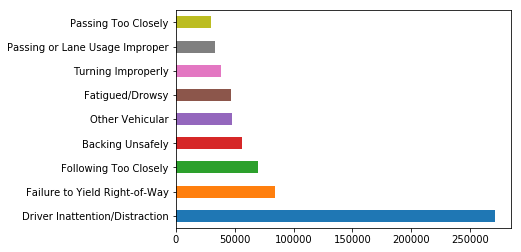

In [6]:
df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()[1:10].plot(kind="barh")

#### Solution

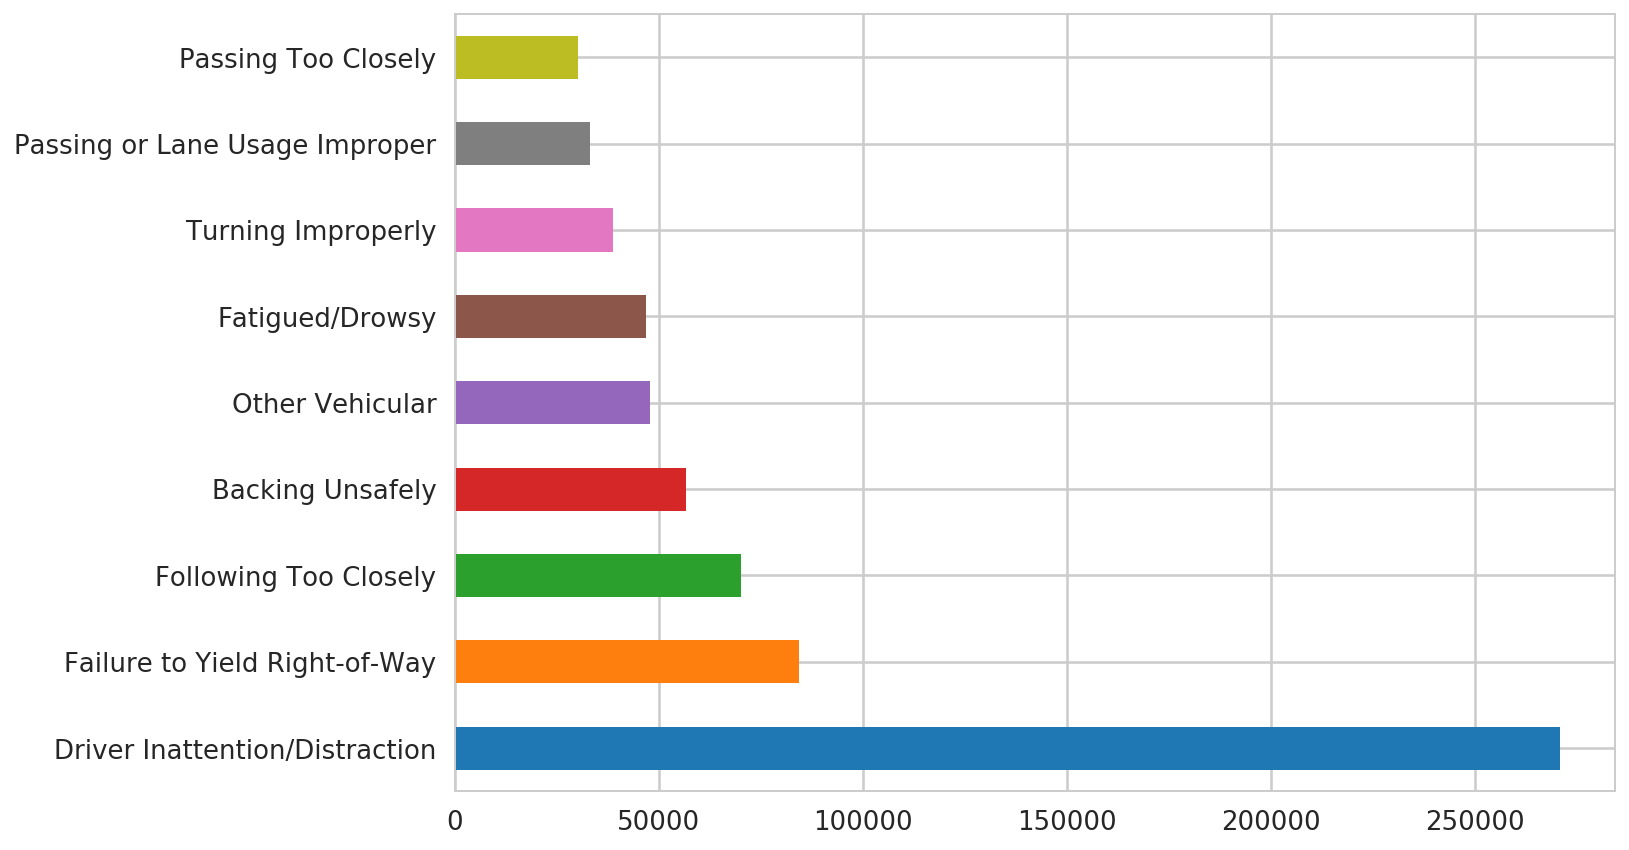

In [126]:
# Task 2: Find out the most common contributing factors to the collisions.
# Notice that we skip the first element (0) of the list, and we get the elements 1:10
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()[1:10].plot(kind='barh')

### Task 3: 

Break down the number of collisions by borough.





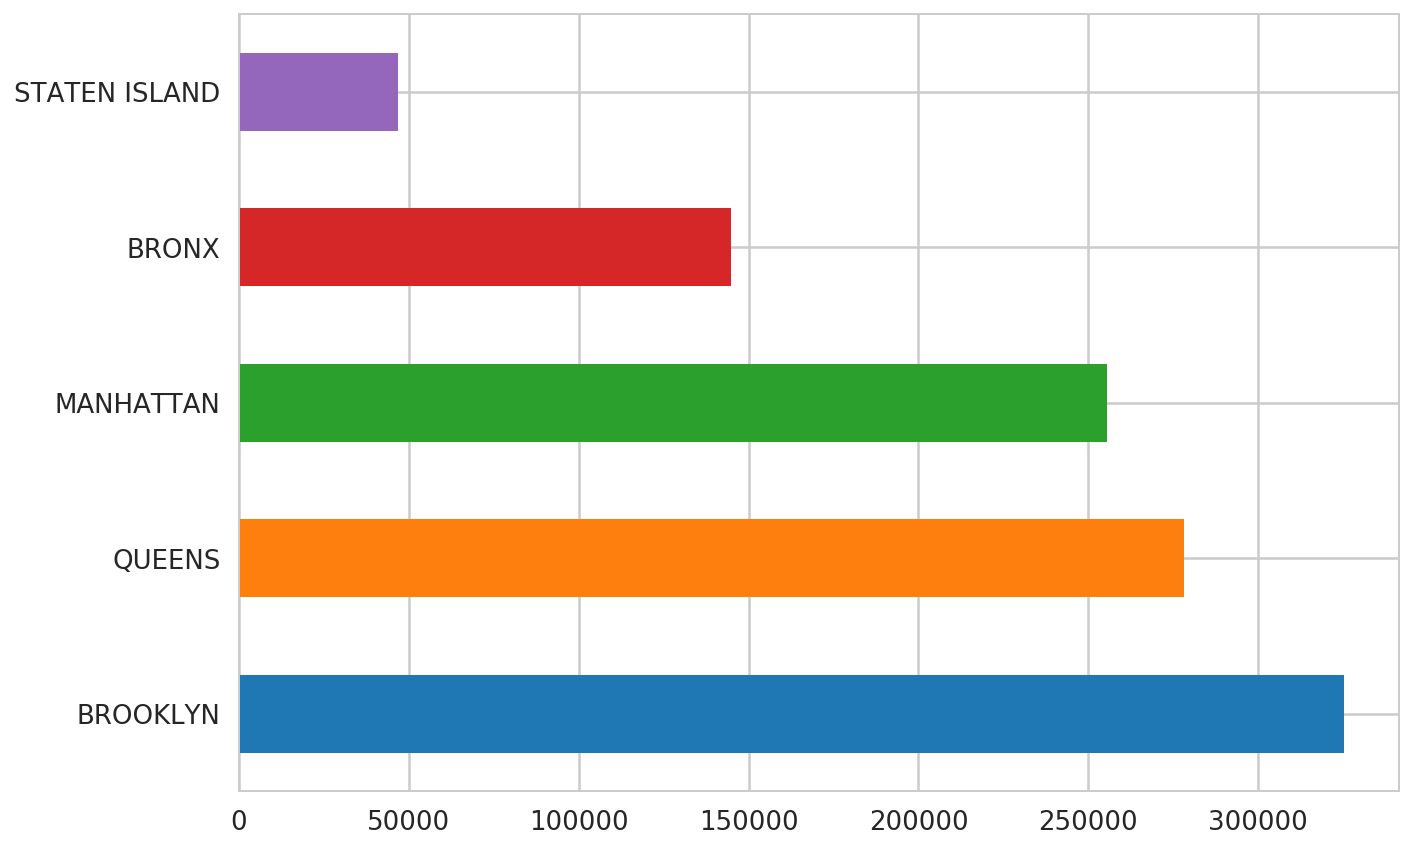

In [145]:
df['BOROUGH'].value_counts().plot(kind='barh')

#### Solution

In [ ]:
# Task 3: Break down the number of collisions by borough.
df['BOROUGH'].value_counts().plot(kind='barh')

### Task 4

Find out the how many collisions had 0 persons injured, 1 persons injured, etc. persons injured in each accident. Use the `value_counts()` approach. You may also find the `.plot(logy=True)` option useful when you create the plot to make the y-axis logarigthmic.
 

Text(0.5, 1.0, 'Analysis of number of injuries per collision')

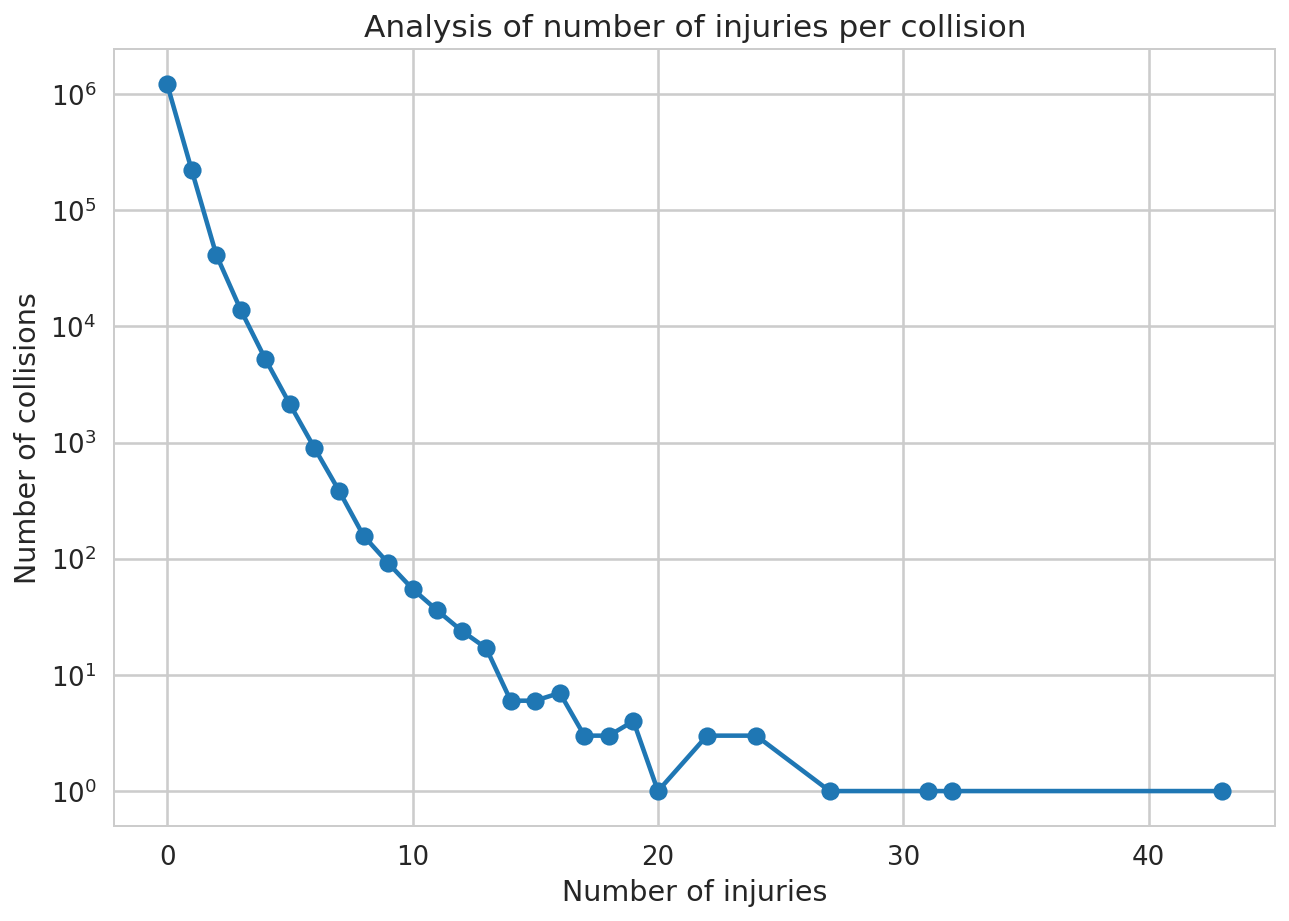

In [146]:
plot = (
    df['NUMBER OF PERSONS INJURED'] # take the num of injuries column
    .value_counts() # compure the freuquency of each value
    .sort_index() # sort the results based on the index value instead of the frequency, 
                  # which is the default for value_counts
    .plot( # and plot the results
        kind='line', # we use a line plot because the x-axis is numeric/continuous
        marker='o',  # we use a marker to mark where we have data points 
        logy=True # make the y-axis logarithmic
    )
)
plot.set_xlabel("Number of injuries")
plot.set_ylabel("Number of collisions")
plot.set_title("Analysis of number of injuries per collision")

#### Solution

In [ ]:
# "Chain" style of writing data maniputation operations
plot = (
    df['NUMBER OF PERSONS INJURED'] # take the num of injuries column
    .value_counts() # compure the freuquency of each value
    .sort_index() # sort the results based on the index value instead of the frequency, 
                  # which is the default for value_counts
    .plot( # and plot the results
        kind='line', # we use a line plot because the x-axis is numeric/continuous
        marker='o',  # we use a marker to mark where we have data points 
        logy=True # make the y-axis logarithmic
    )
)
plot.set_xlabel("Number of injuries")
plot.set_ylabel("Number of collisions")
plot.set_title("Analysis of number of injuries per collision")

### Task 5

Break down the accidents by borough and contributing factor. Use the `pivot_table` function of Pandas
 

In [147]:
pivot = pd.pivot_table(
    data = df, # we analyze the df (accidents) dataframe
    index = 'CONTRIBUTING FACTOR VEHICLE 1', 
    columns = 'BOROUGH', 
    values = 'UNIQUE KEY', 
    aggfunc = 'count'
)
pivot

BOROUGH                                               BRONX  BROOKLYN  \
CONTRIBUTING FACTOR VEHICLE 1                                           
1                                                       NaN       3.0   
80                                                     12.0      19.0   
Accelerator Defective                                  89.0     168.0   
Aggressive Driving/Road Rage                          720.0    1169.0   
Alcohol Involvement                                  1587.0    3066.0   
Animals Action                                         80.0     146.0   
Backing Unsafely                                     6317.0   13073.0   
Brakes Defective                                      562.0     965.0   
Cell Phone (hand-Held)                                 42.0      54.0   
Cell Phone (hand-held)                                  8.0      21.0   
Cell Phone (hands-free)                                15.0      57.0   
Driver Inattention/Distraction                      20841.0   47479.0   
Driver Inexperience                                  2041.0    4346.0   
Driverless/Runaway Vehicle                            110.0     218.0   
Drugs (Illegal)                                        55.0      93.0   
Drugs (illegal)                                        52.0      71.0   
Eating or Drinking                                      8.0      16.0   
Failure to Keep Right                                 213.0     539.0   
Failure to Yield Right-of-Way                        6255.0   20501.0   
Fatigued/Drowsy                                      2279.0    7556.0   
Fell Asleep                                           282.0     731.0   
Following Too Closely                                3961.0    9096.0   
Glare                                                 416.0     589.0   
Headlights Defective                                    6.0      25.0   
Illnes                                                 87.0     167.0   
Illness                                               164.0     413.0   
Lane Marking Improper/Inadequate                       70.0      92.0   
Listening/Using Headphones                              3.0       2.0   
Lost Consciousness                                   1138.0    4821.0   
Obstruction/Debris                                    257.0     479.0   
...                                                     ...       ...   
Other Lighting Defects                                  9.0      38.0   
Other Vehicular                                      6551.0    6791.0   
Outside Car Distraction                               868.0    2065.0   
Oversized Vehicle                                     796.0    2636.0   
Passenger Distraction                                 739.0    1622.0   
Passing Too Closely                                  3377.0    7451.0   
Passing or Lane Usage Improper                       2513.0    5970.0   
Pavement Defective                                    150.0     374.0   
Pavement Slippery                                    1543.0    2700.0   
Pedestrian/Bicyclist/Other Pedestrian Error/Con...    639.0    1110.0   
Physical Disability                                   720.0    2568.0   
Prescription Medication                              1405.0    3648.0   
Reaction to Other Uninvolved Vehicle                  112.0     317.0   
Reaction to Uninvolved Vehicle                        828.0    1686.0   
Shoulders Defective/Improper                           12.0       5.0   
Steering Failure                                      169.0     376.0   
Texting                                                 1.0       5.0   
Tinted Windows                                         11.0      20.0   
Tire Failure/Inadequate                               117.0     207.0   
Tow Hitch Defective                                    17.0      32.0   
Traffic Control Device Improper/Non-Working            60.0     137.0   
Traffic Control Disregarded                          2195.

#### Solution

In [ ]:
pivot = pd.pivot_table(
    data = df, # we analyze the df (accidents) dataframe
    index = 'CONTRIBUTING FACTOR VEHICLE 1', 
    columns = 'BOROUGH', 
    values = 'UNIQUE KEY', 
    aggfunc = 'count'
)
pivot

### Task 6

Find the dates with the most accidents. Can you figure out what happened on these days? 


In [148]:
df.DATE.value_counts()

01/21/2014    1161
11/15/2018    1064
12/15/2017     999
05/19/2017     974
01/18/2015     961
02/03/2014     960
03/06/2015     939
05/18/2017     911
01/07/2017     897
03/02/2018     884
12/14/2017     883
09/30/2016     872
11/26/2013     867
11/09/2018     865
04/28/2017     857
03/08/2013     851
10/21/2016     851
06/22/2017     845
06/29/2018     844
12/14/2018     841
03/16/2017     839
06/14/2018     833
10/30/2017     832
10/27/2016     831
03/05/2015     830
10/12/2018     829
06/13/2017     829
09/15/2017     827
10/20/2017     823
09/06/2018     821
              ... 
09/03/2012     373
01/06/2019     372
10/30/2012     372
01/13/2019     371
05/29/2017     371
12/25/2016     365
02/01/2015     361
01/20/2014     360
07/04/2014     360
10/31/2015     357
01/21/2013     355
12/25/2012     354
12/28/2014     349
11/02/2012     345
11/04/2012     344
03/02/2014     344
01/11/2015     341
12/25/2017     333
12/25/2018     329
12/25/2015     321
01/05/2014     320
11/01/2015  

#### Solution

In [ ]:
df.DATE.value_counts()

### Task 7

Plot the number of accidents per day. (Hint: Ensure that your date column is in the right datatype and that it is properly sorted, before plotting)


In [149]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%m/%d/%Y")

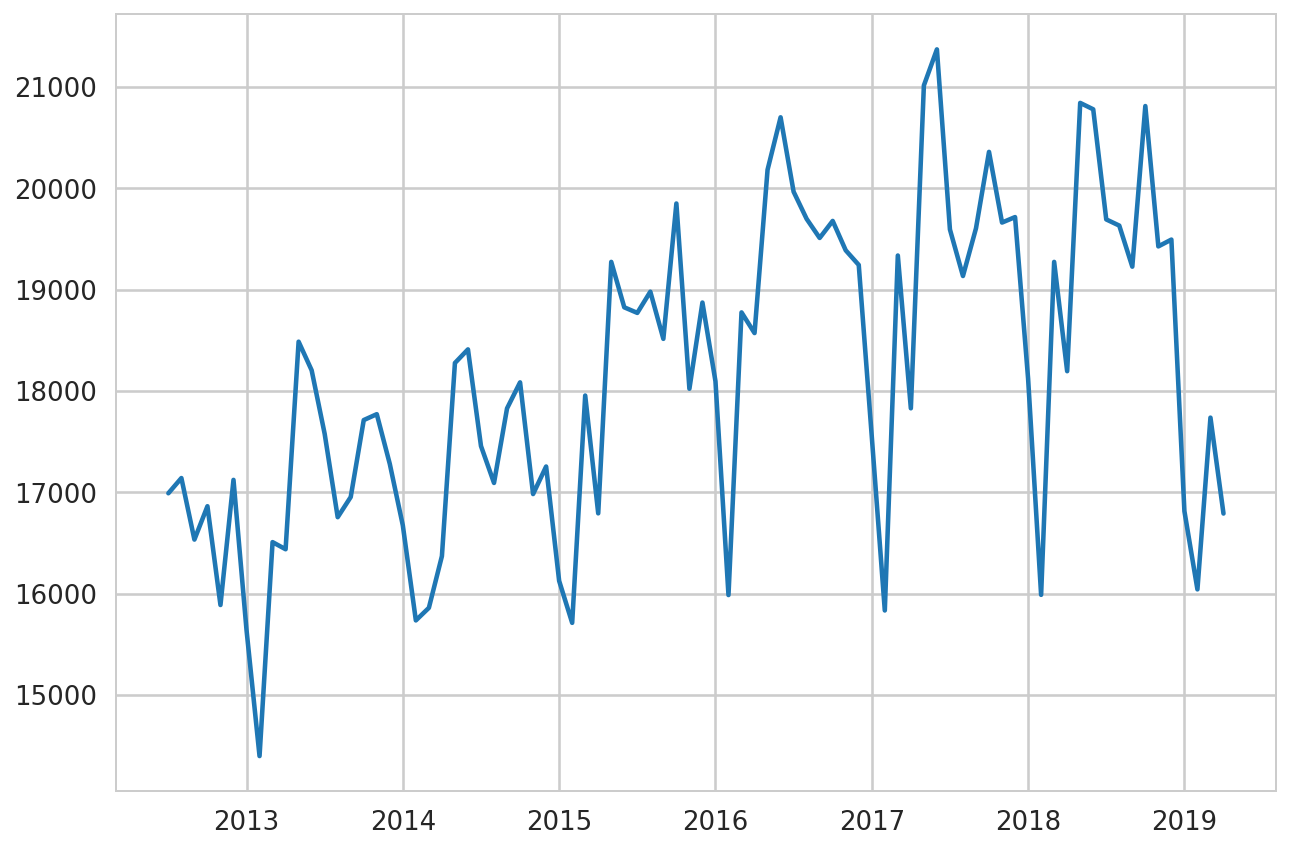

In [150]:
(
    df.DATE.value_counts() # count the number of accidents per day
    .sort_index() # sort the dates
    .resample('1M') # take periods of 1 month
    .sum() # sum the number of accidents per month
    .drop(pd.to_datetime('2019-05-31'), axis='index') # drop the current month
    .plot() # plot the result
)

#### Solution 

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], format="%m/%d/%Y")

In [ ]:
(
    df.DATE.value_counts() # count the number of accidents per day
    .sort_index() # sort the dates
    .resample('1M') # take periods of 1 month
    .sum() # sum the number of accidents per month
    .drop(pd.to_datetime('2019-05-31'), axis='index') # drop the current month
    .plot() # plot the result
)

### Task 8

Plot the accidents in map. Use a scatter plot using the `plot(kind='scatter', x=..., y=....)` command, and use the `LATITUDE` and `LONGITUDE` parameters. (Hint: **You will have to remove bad data points before getting into the right visual result**. To do this, specify a selection condition to limit the lat/long values to be values that are proper for the NYC region.)

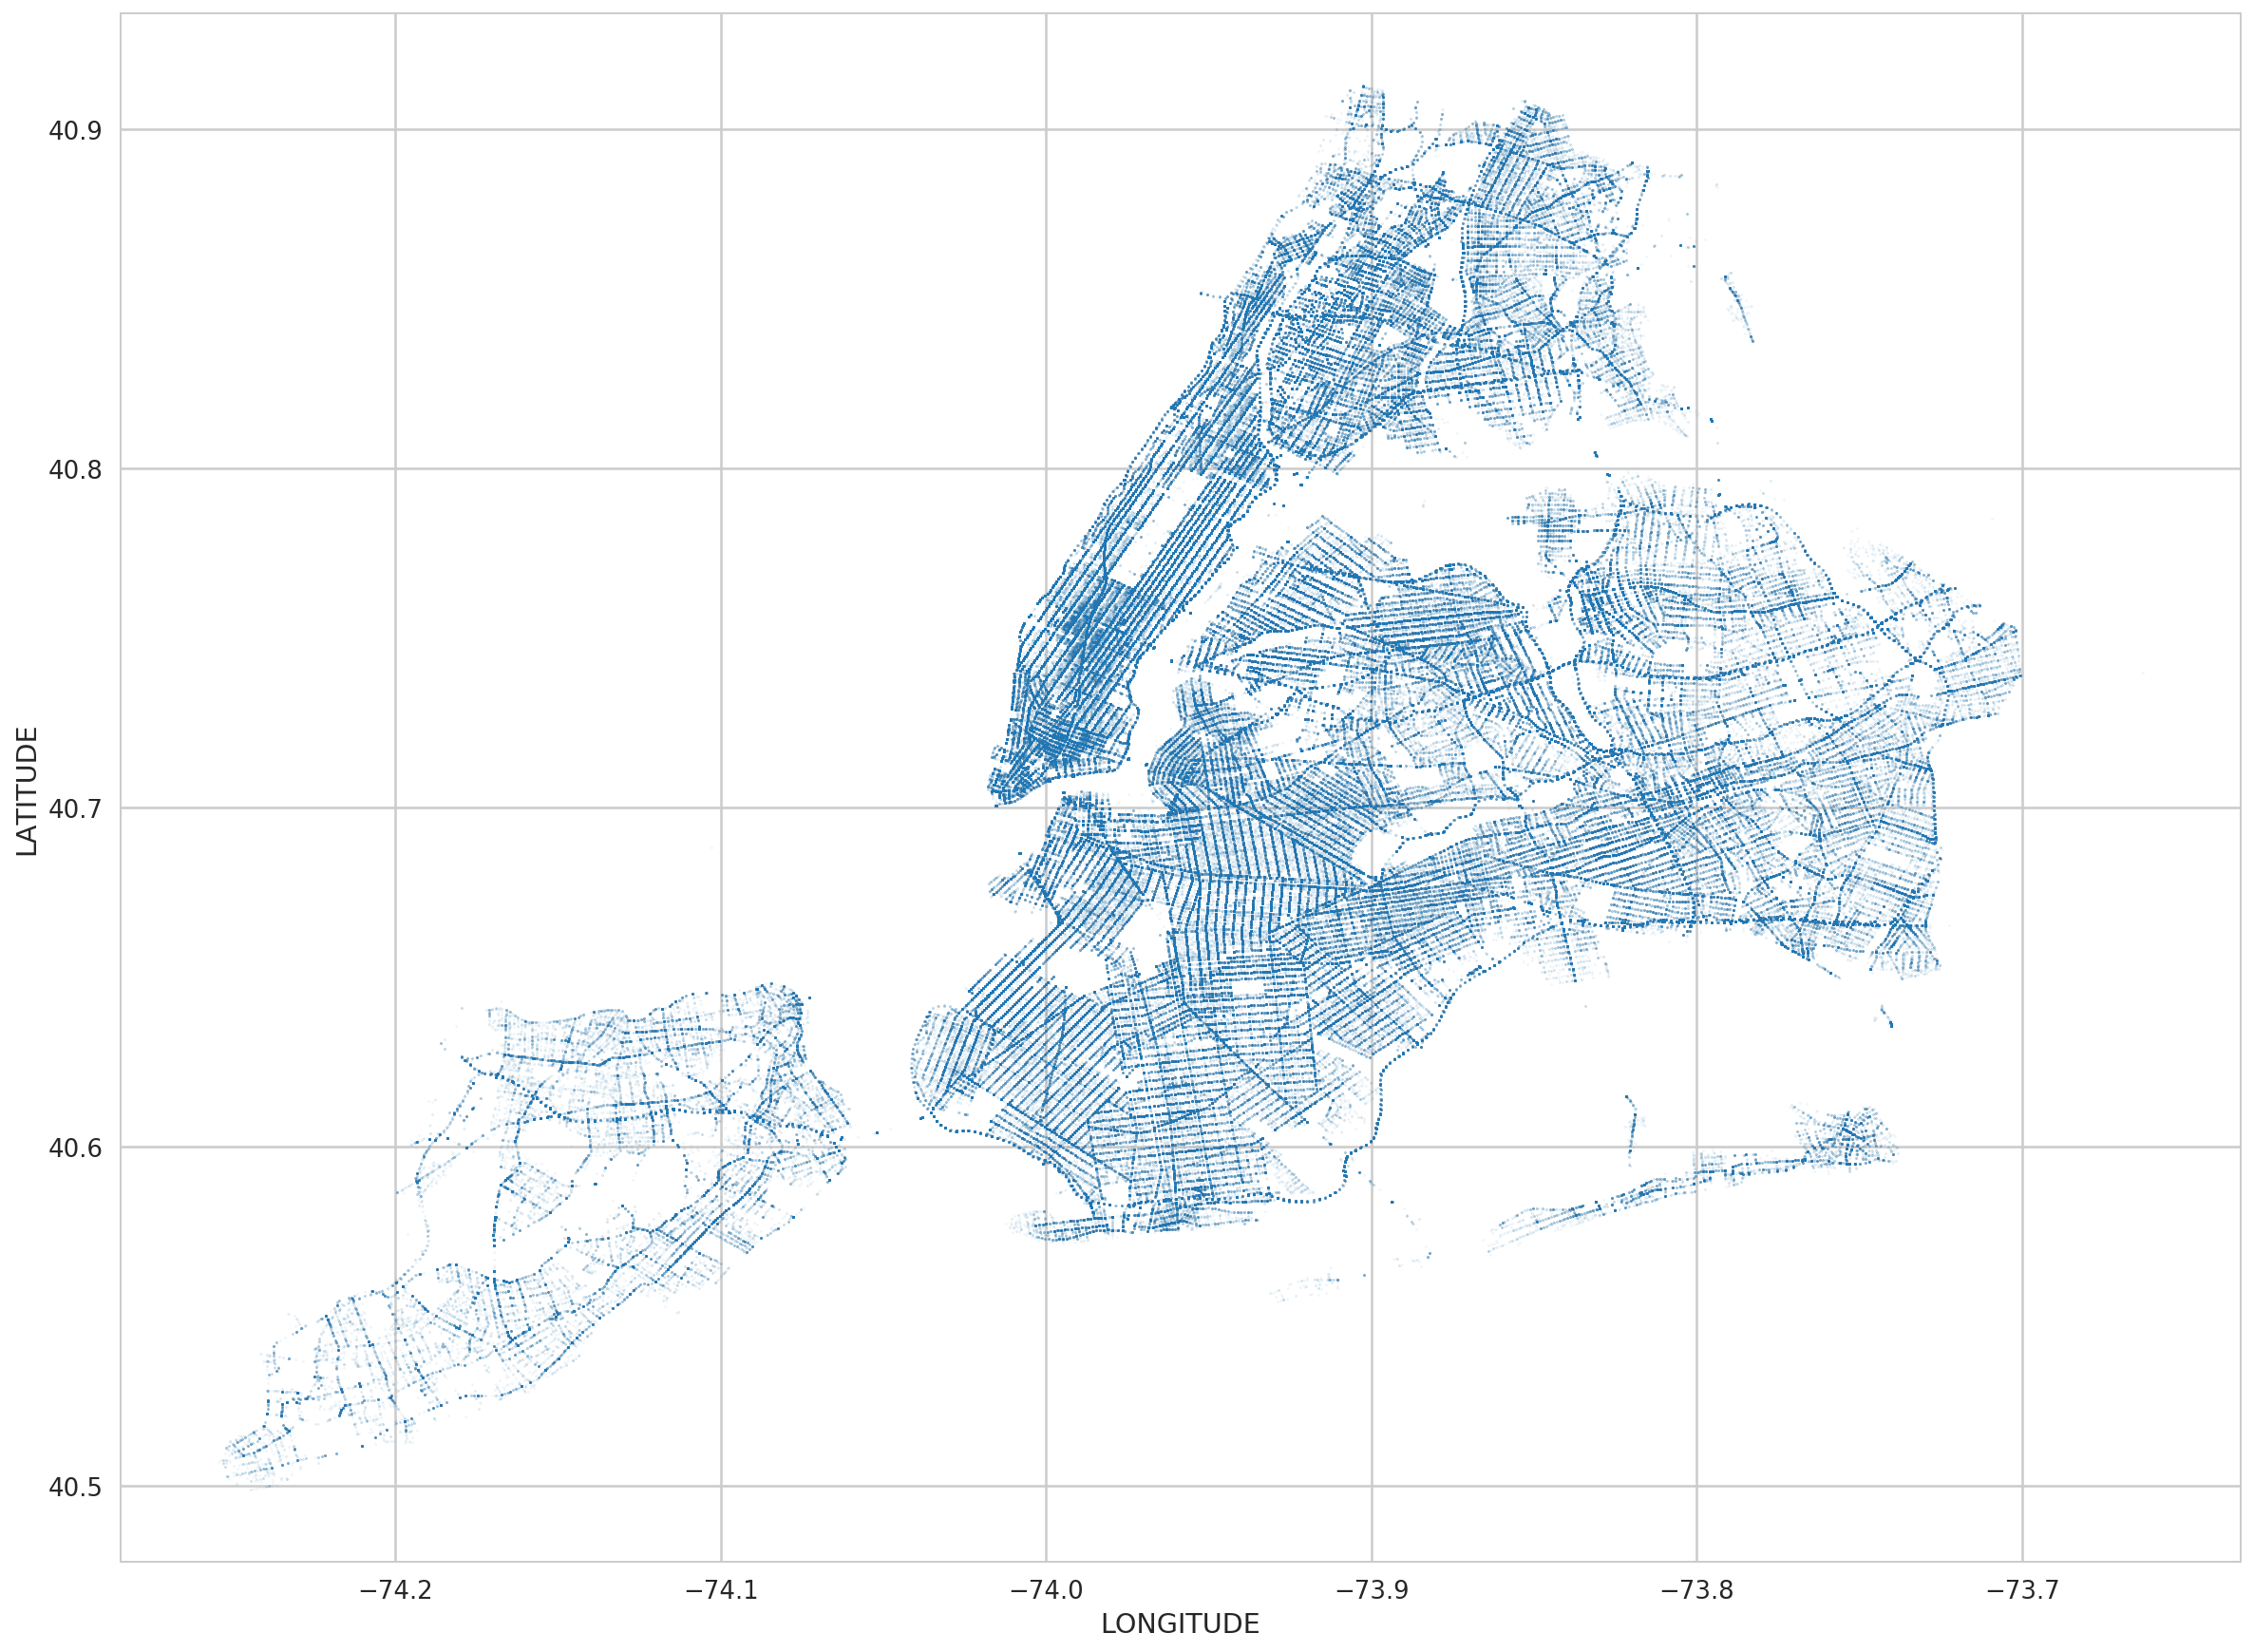

In [151]:
cleandf = df[(df.LONGITUDE<-50) & (df.LONGITUDE>-74.5) & (df.LATITUDE< 41)]

cleandf.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 1, # make the size of the marker 1 pixel
    figsize = (20,15), # increase the size of the figure
    alpha = 0.05 # make each dot to be 95% transparent 
)

#### Solution

In [ ]:
cleandf = df[(df.LONGITUDE<-50) & (df.LONGITUDE>-74.5) & (df.LATITUDE< 41)]

cleandf.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 1, # make the size of the marker 1 pixel
    figsize = (20,15), # increase the size of the figure
    alpha = 0.05 # make each dot to be 95% transparent 
)

### Task 9

Plot the accidents in map as above, but limit the data only to accidents with at least one injury.

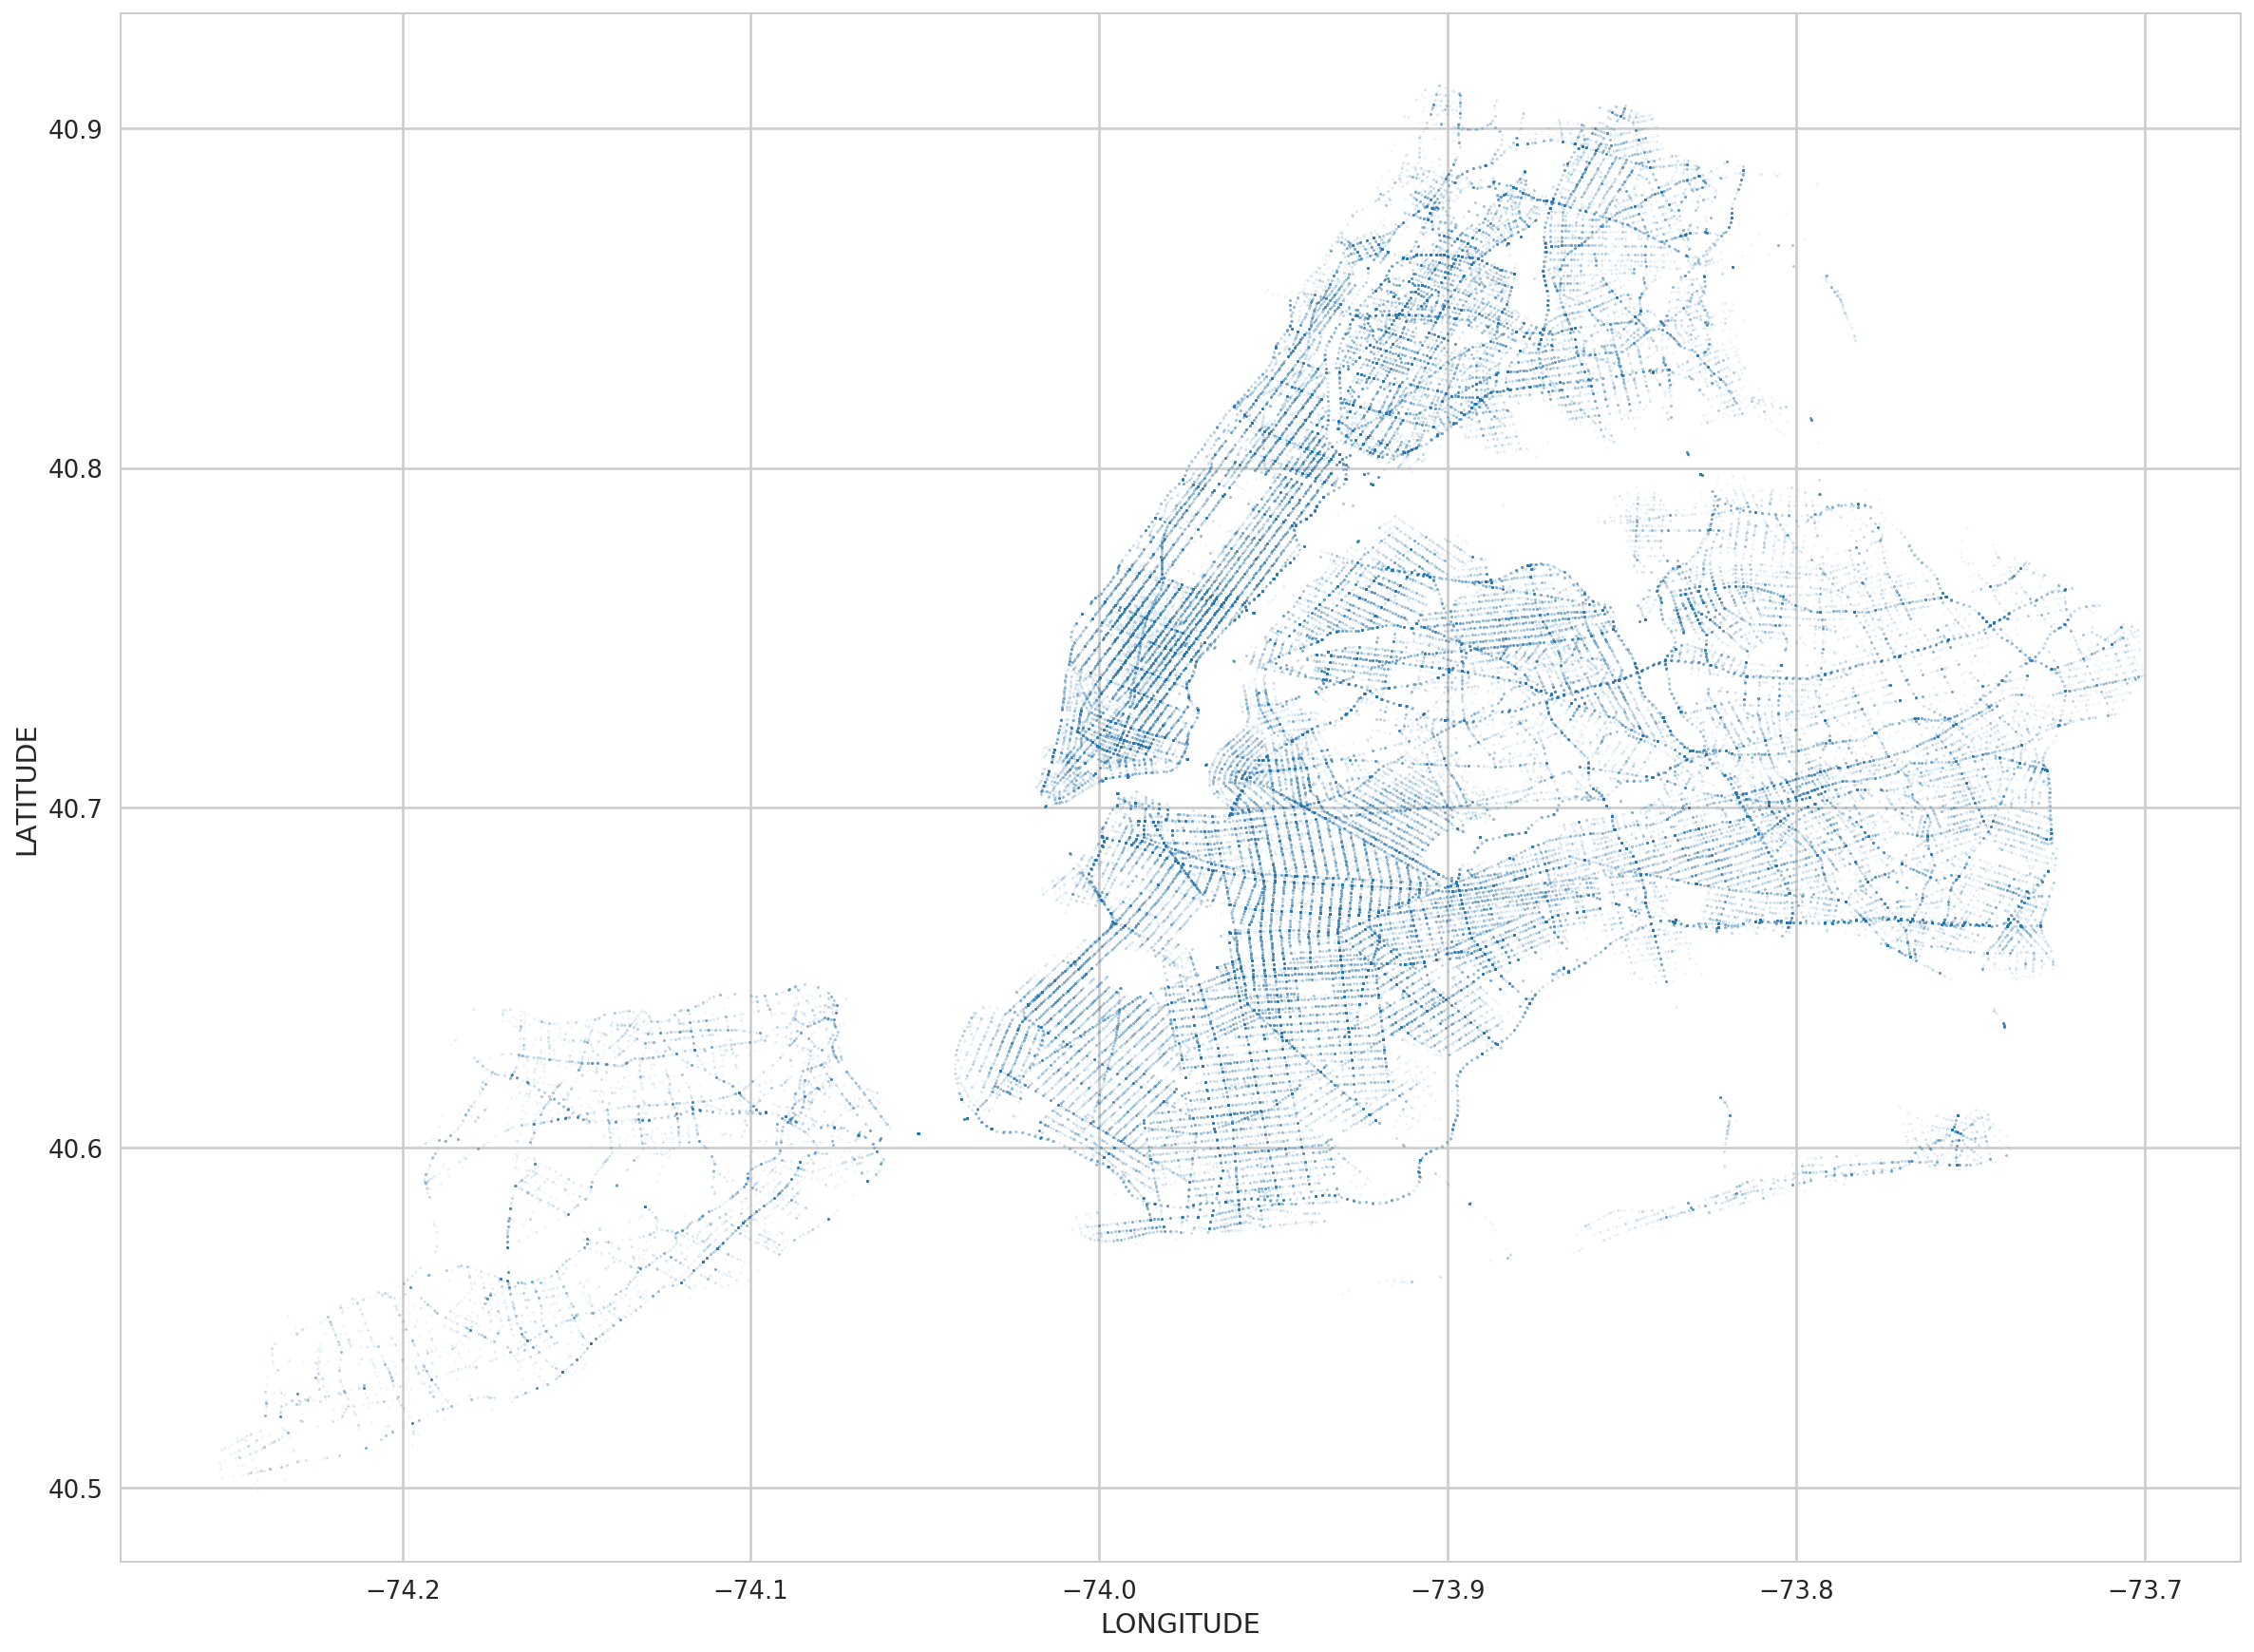

In [152]:
cleandf = df[(df.LONGITUDE<-50) & (df.LONGITUDE>-74.5) & (df.LATITUDE< 41)]

mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_df = cleandf[mask_injured]

injured_df.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 1, # make the size of the marker 1 pixel
    figsize = (20,15), # increase the size of the figure
    alpha = 0.05 # make each dot to be 95% transparent 
)

#### Solution

In [ ]:
cleandf = df[(df.LONGITUDE<-50) & (df.LONGITUDE>-74.5) & (df.LATITUDE< 41)]

mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_df = cleandf[mask_injured]

injured_df.plot(
    kind = 'scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    s = 1, # make the size of the marker 1 pixel
    figsize = (20,15), # increase the size of the figure
    alpha = 0.05 # make each dot to be 95% transparent 
)

### Bonus plots

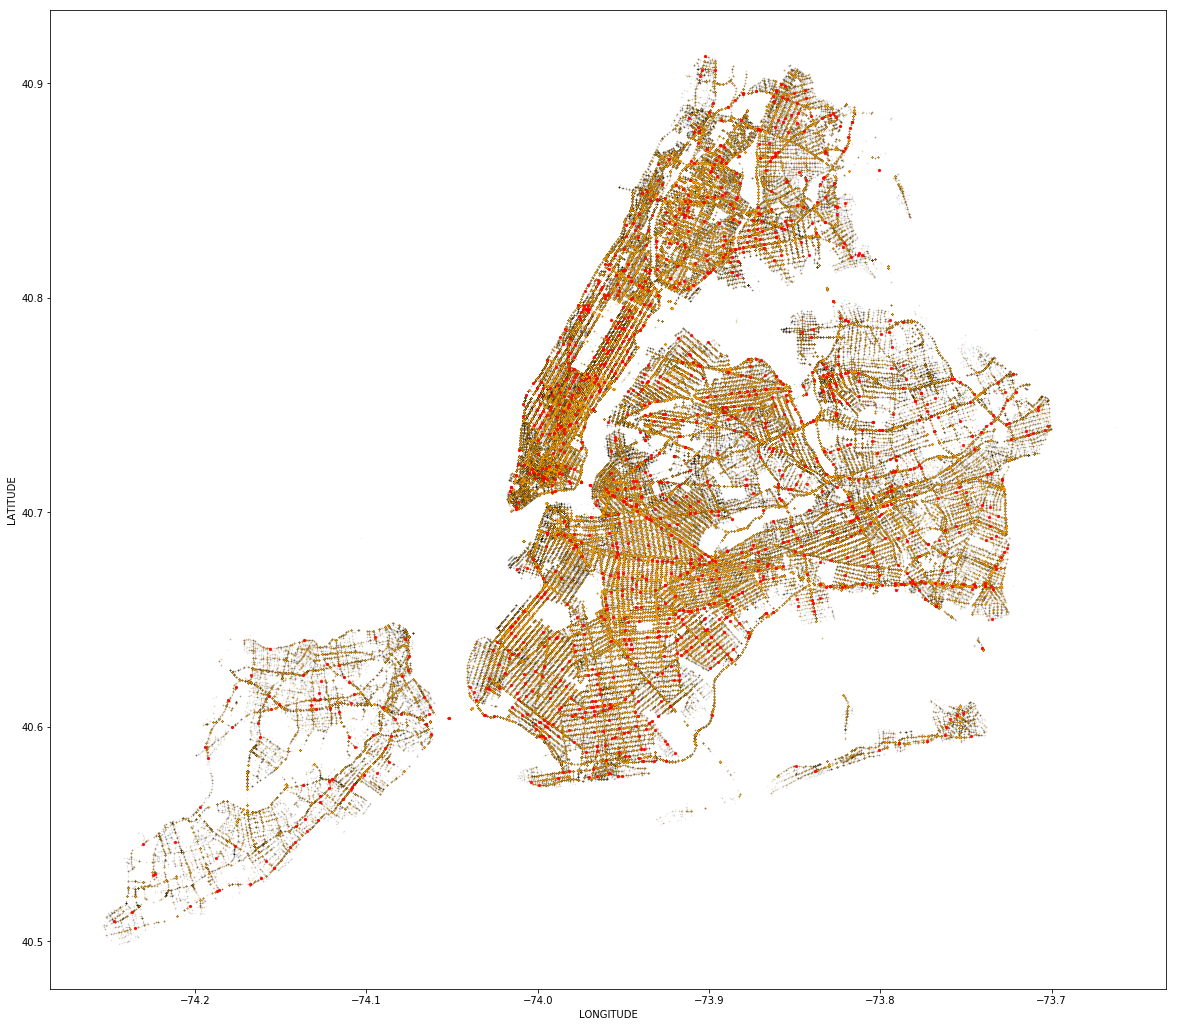

In [7]:
# In the code below, we create three plots
# One with  all the accidents (in black)
# One with all accidents that resulted in an injury (with orange)
# One with all the accidents with deaths (with red dots) 
# Then wen combine the  plots using the "ax" parameter

df = pd.read_csv("accidents.csv", low_memory=False)

# We put conditions to keep only rows that 
# have reasonable values for LONGITUDE and LATITUDE
# The & character is the "AND" in Pandas
# the df.LATITUDE is equivalent to df['LATITUDE']
cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5 # make the size of the market just 0.5 pixel
)

# We will keep only entries with at least one injury
# note that we cannot use the df.NUMBER OF PERSON INJURED notation
# because the attribute contains spaces.
mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_plot = cleandf[mask_injured].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots
    s = 1 # make the size of the market just 1 pixel
)

# we want only accidents with at least one death
mask_killed = cleandf['NUMBER OF PERSONS KILLED']>=1
cleandf[mask_killed].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market 5 pixels, to be more visible
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots
)

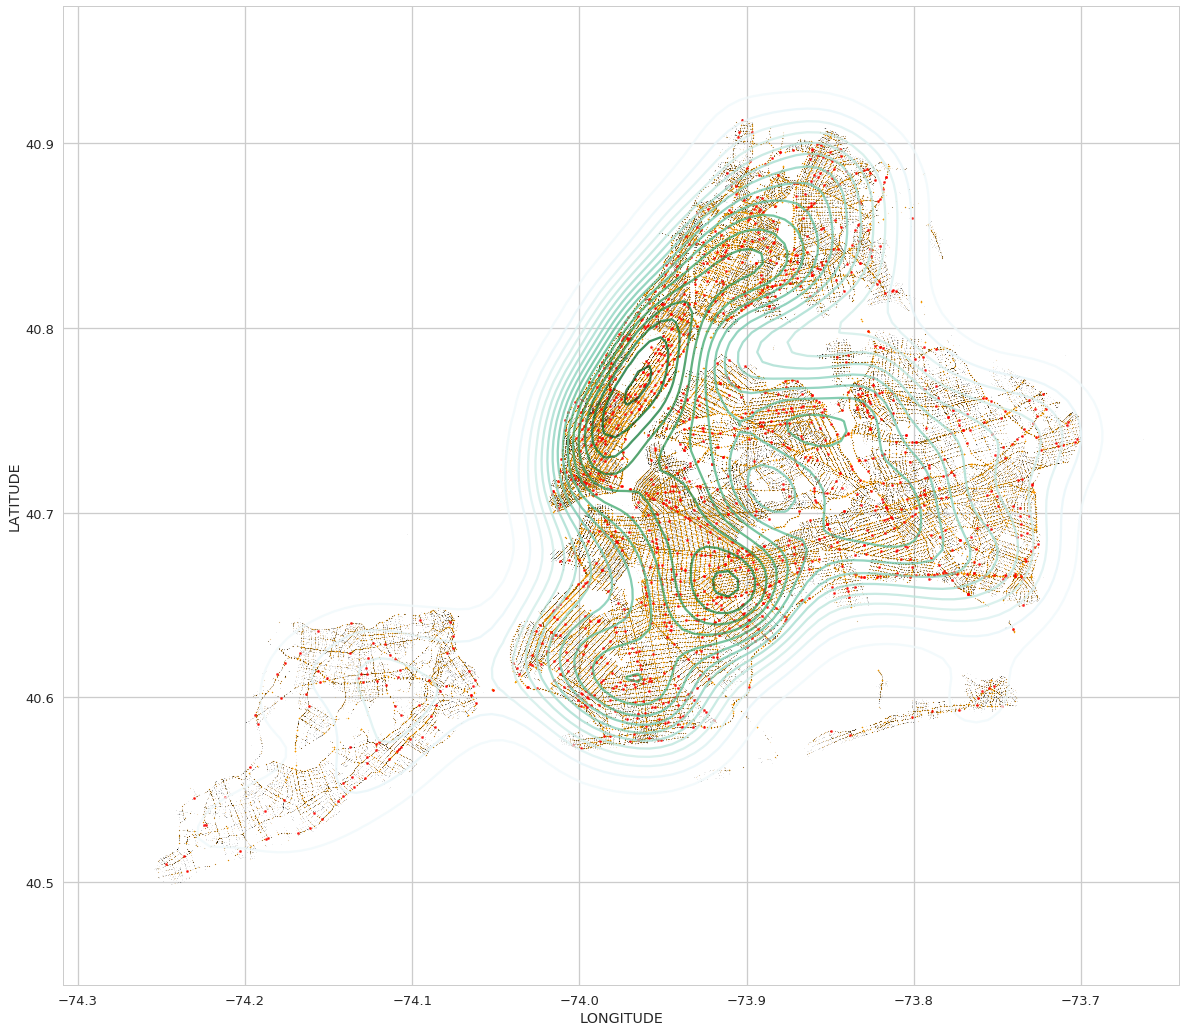

In [25]:
# Same as above, but with a 2-d density estimation for the location of
# accidents that resulted in at least one death

cleandf = df[ (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5) ]


all_accidents_plot = cleandf.plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    color = 'black',
    alpha = 0.05, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 0.5 # make the size of the market just 0.5 pixel
)

# We will keep only entries with at least one injury
# note that we cannot use the df.NUMBER OF PERSON INJURED notation
# because the attribute contains spaces.
mask_injured = cleandf['NUMBER OF PERSONS INJURED']>=1
injured_plot = cleandf[mask_injured].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.1, # makes the data points transparent (1 = opaque, 0 fully transparent)
    color = 'orange',
    ax = all_accidents_plot, # the ax parameter allows us to combine plots
    s = 1 # make the size of the market just 1 pixel
)

# we want only accidents with at least one death
mask_killed = cleandf['NUMBER OF PERSONS KILLED']>=1
killed_plot = cleandf[mask_killed].plot (
    kind='scatter',
    x = 'LONGITUDE',
    y = 'LATITUDE',
    figsize = (20, 18), # changes the size of the plot to be bigger and square
    alpha = 0.85, # makes the data points transparent (1 = opaque, 0 fully transparent)
    s = 5, # make the size of the market 5 pixels, to be more visible
    color = 'red',
    ax = injured_plot # the ax parameter allows us to combine plots
)

sns.set_style("white")
mask = cleandf['NUMBER OF PERSONS KILLED']>=1
sample = cleandf[mask] # .sample(10000)

sns.kdeplot(sample.LONGITUDE, sample.LATITUDE, gridsize=100,
            cmap=plt.cm.BuGn, shade=False, shade_lowest=True, n_levels=20, alpha=0.75, ax = killed_plot)
